In [8]:
import os
import glob
import tqdm
import wfdb
import pickle
import wfdb as wf
import numpy as np

from data_structure import EcgSignal, Annotation

# preprocessing_data.py
# data_handling.py

In [9]:
def get_records():
    """ Get paths for data in data/mit/ directory """
    # There are 3 files for each record
    # *.atr is one of them
    path_source = r'C:\Users\SOUMYA\Downloads\Project\Heart\Training\Database\mitMVAdb/*.atr'
    paths = []
    for i in (range(400,700)):
        if (os.path.isfile("Database/mitMVAdb/"+str(i) + ".dat")):
             paths.append('Database/mitMVAdb/'+str(i))

    # Get rid of the extension
#     paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

In [10]:
# Check number of patients
records = get_records()
records = np.transpose(records)
for i,val in enumerate(records): 
    print("No."+str(i+1)+" => "+val)
    
print('** Total record :'+str(len(records))+" **")

No.1 => Database/mitMVAdb/418
No.2 => Database/mitMVAdb/419
No.3 => Database/mitMVAdb/420
No.4 => Database/mitMVAdb/421
No.5 => Database/mitMVAdb/422
No.6 => Database/mitMVAdb/423
No.7 => Database/mitMVAdb/424
No.8 => Database/mitMVAdb/425
No.9 => Database/mitMVAdb/426
No.10 => Database/mitMVAdb/427
No.11 => Database/mitMVAdb/428
No.12 => Database/mitMVAdb/429
No.13 => Database/mitMVAdb/430
No.14 => Database/mitMVAdb/602
No.15 => Database/mitMVAdb/605
No.16 => Database/mitMVAdb/607
No.17 => Database/mitMVAdb/609
No.18 => Database/mitMVAdb/610
No.19 => Database/mitMVAdb/611
No.20 => Database/mitMVAdb/612
No.21 => Database/mitMVAdb/614
No.22 => Database/mitMVAdb/615
** Total record :22 **


In [4]:
# Show Patient meta data
"""
fs = Sampling rate
sig_len = total number of samples
n_sig: total number of channel
base_date: additional info
base_time: additional info
units: Channel units
sig_name: Channel name
comments: additional info
"""
for path in records[:]:
    print('Loading file:', path)

    # Read in the data
    record = wf.rdsamp(path)
    
    # patient ECG data samples are in record[0]
    # patient meta data are in record[1]
    print(record[1]) # print all meta data
    for key, value in record[1].items() :
        print (key+": "+str(value))
    print()

Loading file: Database/mitMVAdb/418
{'fs': 250, 'sig_len': 525000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG', 'ECG'], 'comments': []}
fs: 250
sig_len: 525000
n_sig: 2
base_date: None
base_time: None
units: ['mV', 'mV']
sig_name: ['ECG', 'ECG']
comments: []

Loading file: Database/mitMVAdb/419
{'fs': 250, 'sig_len': 525000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG', 'ECG'], 'comments': []}
fs: 250
sig_len: 525000
n_sig: 2
base_date: None
base_time: None
units: ['mV', 'mV']
sig_name: ['ECG', 'ECG']
comments: []

Loading file: Database/mitMVAdb/420
{'fs': 250, 'sig_len': 525000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG', 'ECG'], 'comments': []}
fs: 250
sig_len: 525000
n_sig: 2
base_date: None
base_time: None
units: ['mV', 'mV']
sig_name: ['ECG', 'ECG']
comments: []

Loading file: Database/mitMVAdb/421
{'fs': 250, 'sig_len': 525000, 'n_sig': 

In [5]:
temp_chname = list()
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,len(record[1]['sig_name'])):
        temp_chname.append(record[1]['sig_name'][1])
    
temp_chname = list(set(temp_chname)) #distinct
print("Channel List: ")
print(temp_chname)

Channel List: 
['ECG']


In [6]:
# Categorize patient based on ECG channel

channel_patient = list()
for i in range(0,len(temp_chname)):
    channel_patient.append(list())
    

totalChan = len(temp_chname);
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,totalChan):
        #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
        if(temp_chname[i] == record[1]['sig_name'][0]):
            channel_patient[i].append(path[-3:])
        if(temp_chname[i] == record[1]['sig_name'][1]):
            channel_patient[i].append(path[-3:])

total_check = 0;
for i in range(0,totalChan):
    print(temp_chname[i])
    print(channel_patient[i])
    print("Total Patient that have channel {}: {}".format(temp_chname[i],str(len(channel_patient[i]))))
    total_check += len(channel_patient[i])
    print()

print("Total patient :"+str(total_check/2)) # 1 patient have 2 channel
print("Total patient * Total Channel :"+str(total_check)) # 1 patient have 2 channel

ECG
['418', '418', '419', '419', '420', '420', '421', '421', '422', '422', '423', '423', '424', '424', '425', '425', '426', '426', '427', '427', '428', '428', '429', '429', '430', '430', '602', '602', '605', '605', '607', '607', '609', '609', '610', '610', '611', '611', '612', '612', '614', '614', '615', '615']
Total Patient that have channel ECG: 44

Total patient :22.0
Total patient * Total Channel :44


In [7]:
# categorize patient with channel divide between patient 100 and 200
channel_patient_100 = list() # patient with code 100-199
for i in range(0,len(temp_chname)):
    channel_patient_100 .append(list())
channel_patient_200 = list() # patient with code 200-299
for i in range(0,len(temp_chname)):
    channel_patient_200.append(list())
    

totalChan = len(temp_chname);
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,totalChan):
        if(int(path[-3:]) >= 200):
                        #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
            if(temp_chname[i] == record[1]['sig_name'][0]):
                channel_patient_200[i].append(path[-3:])
            if(temp_chname[i] == record[1]['sig_name'][1]):
                channel_patient_200[i].append(path[-3:])
        else:  
            #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
            if(temp_chname[i] == record[1]['sig_name'][0]):
                channel_patient_100[i].append(path[-3:])
            if(temp_chname[i] == record[1]['sig_name'][1]):
                channel_patient_100[i].append(path[-3:])

total_check = 0;
for i in range(0,totalChan):
    print("#### "+temp_chname[i])
    print("= id 100 = | Count patient in this Channel: "+str(len(channel_patient_100[i])))
    print(channel_patient_100[i])
    print()
    total_check += len(channel_patient_100[i])
    print("= id 200 = | Count patient in this Channel: "+str(len(channel_patient_200[i])))
    print(channel_patient_200[i])
    
    total_check += len(channel_patient_200[i])
    print()
print("Total patient : "+str(total_check/2)) # 1 patient have 2 channel
print("Total patient x Total Channel :"+str(total_check)) # 1 patient have 2 channel

#### ECG
= id 100 = | Count patient in this Channel: 0
[]

= id 200 = | Count patient in this Channel: 44
['418', '418', '419', '419', '420', '420', '421', '421', '422', '422', '423', '423', '424', '424', '425', '425', '426', '426', '427', '427', '428', '428', '429', '429', '430', '430', '602', '602', '605', '605', '607', '607', '609', '609', '610', '610', '611', '611', '612', '612', '614', '614', '615', '615']

Total patient : 22.0
Total patient x Total Channel :44


In [12]:
def createDistributedAnnotations(annotationArray,hi,NSRsymbol):
    """
    Generate pointwise annotation
    Arguments:
        annotationArray {array} -- array of annotations
        hi {int} -- length
        NSRsymbol {str} -- string representation of NSR
    Returns:
        [list] -- point wise annotation array
    """
    labelArray=[]
    localLo = 0
    localHi = annotationArray[0].index
    currLabel = NSRsymbol

    ## The following is similar to interval covering algorithms
    ## We are assuming the first unannotated part to be NSR
    for i in range(localLo,localHi):
        labelArray.append(currLabel)

    ## now for the other actual annotated segments
    for i in range(1,len(annotationArray)):               # interval
        localLo = annotationArray[i-1].index
        localHi = annotationArray[i].index
        currLabel = annotationArray[i-1].label
        for j in range(localLo,localHi):
            labelArray.append(currLabel)

    ## for the last segment
    localLo = annotationArray[len(annotationArray)-1].index
    localHi = hi
    currLabel = annotationArray[len(annotationArray)-1].label
    for j in range(localLo, localHi):
        labelArray.append(currLabel)

    return labelArray                 # point wise annotation array
    
def createAnnotationArray(indexArray,labelArray,hi,NSRsymbol):
    '''
    Create the annotation array
    Arguments:
        indexArray {list} -- list of indices
        labelArray {list} -- list of labels
        hi {int} -- length
        NSRsymbol {str} -- string representation of NSR
    Returns:
        [list] -- point wise annotation array
    '''
    annotations = []
    for i in range(len(indexArray)):
        annotations.append(Annotation(index=indexArray[i],label=labelArray[i]))
    distributedAnnotations = createDistributedAnnotations(annotationArray=annotations,hi=hi,NSRsymbol=NSRsymbol)
    return distributedAnnotations

In [13]:
records

array(['Database/mitMVAdb/418', 'Database/mitMVAdb/419',
       'Database/mitMVAdb/420', 'Database/mitMVAdb/421',
       'Database/mitMVAdb/422', 'Database/mitMVAdb/423',
       'Database/mitMVAdb/424', 'Database/mitMVAdb/425',
       'Database/mitMVAdb/426', 'Database/mitMVAdb/427',
       'Database/mitMVAdb/428', 'Database/mitMVAdb/429',
       'Database/mitMVAdb/430', 'Database/mitMVAdb/602',
       'Database/mitMVAdb/605', 'Database/mitMVAdb/607',
       'Database/mitMVAdb/609', 'Database/mitMVAdb/610',
       'Database/mitMVAdb/611', 'Database/mitMVAdb/612',
       'Database/mitMVAdb/614', 'Database/mitMVAdb/615'], dtype='<U21')

In [16]:
for j in records:
    signals, fields = wfdb.rdsamp(j)     # collect the signal and metadata
    Fs=fields['fs']                         # sampling frequency 

    channel1Signal = []                     # channel 1 signal
    channel2Signal = []                     # channel 2 signal

    for i in signals:
        channel1Signal.append(i[0])         # separating the two channels
        channel2Signal.append(i[1])

    channel1Signal = np.array(channel1Signal)       # converting lists to numpy arrays
    channel2Signal = np.array(channel2Signal)

    annotation = wfdb.rdann(j, 'atr')            # collecting the annotation
    annotIndex = annotation.sample                  # annotation indices
    annotSymbol = annotation.aux_note               # annotation symbols
#     print(annotSymbol)
    
    for i in range(len(annotSymbol)):
        annotSymbol[i] = annotSymbol[i].rstrip('\x00') # because the file contains \x00 
        if(annotSymbol[i]=='(N'):           # N = NSR
            annotSymbol[i]='(NSR'
        elif (annotSymbol[i] == '(VFIB'):   # VFIB = VF
            annotSymbol[i] = '(VF'
            
    # creating the annotation array
    Te = 5
    fileNo = int(j[-3:])
    print(fileNo)
    annotationArr = createAnnotationArray(indexArray=annotIndex,labelArray=annotSymbol,hi=len(channel1Signal),NSRsymbol='(NSR') 
    nSamplesIn1Sec = Fs             # computing samples in one episode
    nSamplesInEpisode = Te * Fs
    ecgSignals = []
    i=0                             # episode counter

    while((i+nSamplesInEpisode)<len(channel1Signal)):         # loop through the whole signal

        j = i + nSamplesInEpisode
        VF = 0                             # VF indices
        notVF = 0                          # Not VF indices
        Noise =0                           # Noise indices

        for k in range(i,j):
            if(annotationArr[k]=='(VF'):
                VF+=1
            else:                          # anything other than VF
                notVF +=1
            if(annotationArr[k]=='(NOISE'):
                Noise += 1

        if(Noise*3<nSamplesInEpisode):     # noisy episode
            # saving channel 1 signal
            ecgEpisode = EcgSignal(signal=channel1Signal[i:j],annotation='VF' if VF>notVF else 'NotVF',channel='Channel1',source='MITMVAdb',Fs=Fs)
            annotation='VF' if VF>notVF else 'NotVF'
            if annotation == 'VF':
                print(annotation)
                print("Pickles/MITMVAdb/"+str(fileNo)+"E" +  str(i // Fs) + "C1.p", "wb")
            # saving channel 2 signal
            ecgEpisode = EcgSignal(signal=channel2Signal[i:j], annotation='VF' if VF > notVF else 'NotVF', channel='Channel2', source='MITMVAdb', Fs=Fs)
            if annotation == 'VF':
                print(annotation)
                print("Pickles/MITMVAdb/"+str(fileNo)+"E" +  str(i // Fs) + "C2.p", "wb")

        i += nSamplesIn1Sec                # sliding the window

418
419
420
421
422
VF
Pickles/MITMVAdb/422E1534C1.p wb
VF
Pickles/MITMVAdb/422E1534C2.p wb
VF
Pickles/MITMVAdb/422E1535C1.p wb
VF
Pickles/MITMVAdb/422E1535C2.p wb
VF
Pickles/MITMVAdb/422E1536C1.p wb
VF
Pickles/MITMVAdb/422E1536C2.p wb
VF
Pickles/MITMVAdb/422E1537C1.p wb
VF
Pickles/MITMVAdb/422E1537C2.p wb
VF
Pickles/MITMVAdb/422E1538C1.p wb
VF
Pickles/MITMVAdb/422E1538C2.p wb
VF
Pickles/MITMVAdb/422E1539C1.p wb
VF
Pickles/MITMVAdb/422E1539C2.p wb
VF
Pickles/MITMVAdb/422E1540C1.p wb
VF
Pickles/MITMVAdb/422E1540C2.p wb
VF
Pickles/MITMVAdb/422E1541C1.p wb
VF
Pickles/MITMVAdb/422E1541C2.p wb
VF
Pickles/MITMVAdb/422E1542C1.p wb
VF
Pickles/MITMVAdb/422E1542C2.p wb
VF
Pickles/MITMVAdb/422E1543C1.p wb
VF
Pickles/MITMVAdb/422E1543C2.p wb
VF
Pickles/MITMVAdb/422E1544C1.p wb
VF
Pickles/MITMVAdb/422E1544C2.p wb
VF
Pickles/MITMVAdb/422E1545C1.p wb
VF
Pickles/MITMVAdb/422E1545C2.p wb
VF
Pickles/MITMVAdb/422E1546C1.p wb
VF
Pickles/MITMVAdb/422E1546C2.p wb
VF
Pickles/MITMVAdb/422E1547C1.p wb
VF
Pickl

VF
Pickles/MITMVAdb/422E1810C1.p wb
VF
Pickles/MITMVAdb/422E1810C2.p wb
VF
Pickles/MITMVAdb/422E1811C1.p wb
VF
Pickles/MITMVAdb/422E1811C2.p wb
VF
Pickles/MITMVAdb/422E1812C1.p wb
VF
Pickles/MITMVAdb/422E1812C2.p wb
VF
Pickles/MITMVAdb/422E1813C1.p wb
VF
Pickles/MITMVAdb/422E1813C2.p wb
VF
Pickles/MITMVAdb/422E1814C1.p wb
VF
Pickles/MITMVAdb/422E1814C2.p wb
VF
Pickles/MITMVAdb/422E1815C1.p wb
VF
Pickles/MITMVAdb/422E1815C2.p wb
VF
Pickles/MITMVAdb/422E1816C1.p wb
VF
Pickles/MITMVAdb/422E1816C2.p wb
VF
Pickles/MITMVAdb/422E1817C1.p wb
VF
Pickles/MITMVAdb/422E1817C2.p wb
VF
Pickles/MITMVAdb/422E1818C1.p wb
VF
Pickles/MITMVAdb/422E1818C2.p wb
VF
Pickles/MITMVAdb/422E1819C1.p wb
VF
Pickles/MITMVAdb/422E1819C2.p wb
VF
Pickles/MITMVAdb/422E1820C1.p wb
VF
Pickles/MITMVAdb/422E1820C2.p wb
VF
Pickles/MITMVAdb/422E1821C1.p wb
VF
Pickles/MITMVAdb/422E1821C2.p wb
VF
Pickles/MITMVAdb/422E1822C1.p wb
VF
Pickles/MITMVAdb/422E1822C2.p wb
VF
Pickles/MITMVAdb/422E1823C1.p wb
VF
Pickles/MITMVAdb/422E1823

423
424
VF
Pickles/MITMVAdb/424E1257C1.p wb
VF
Pickles/MITMVAdb/424E1257C2.p wb
VF
Pickles/MITMVAdb/424E1258C1.p wb
VF
Pickles/MITMVAdb/424E1258C2.p wb
VF
Pickles/MITMVAdb/424E1259C1.p wb
VF
Pickles/MITMVAdb/424E1259C2.p wb
VF
Pickles/MITMVAdb/424E1260C1.p wb
VF
Pickles/MITMVAdb/424E1260C2.p wb
VF
Pickles/MITMVAdb/424E1261C1.p wb
VF
Pickles/MITMVAdb/424E1261C2.p wb
VF
Pickles/MITMVAdb/424E1262C1.p wb
VF
Pickles/MITMVAdb/424E1262C2.p wb
VF
Pickles/MITMVAdb/424E1263C1.p wb
VF
Pickles/MITMVAdb/424E1263C2.p wb
VF
Pickles/MITMVAdb/424E1264C1.p wb
VF
Pickles/MITMVAdb/424E1264C2.p wb
VF
Pickles/MITMVAdb/424E1265C1.p wb
VF
Pickles/MITMVAdb/424E1265C2.p wb
VF
Pickles/MITMVAdb/424E1266C1.p wb
VF
Pickles/MITMVAdb/424E1266C2.p wb
VF
Pickles/MITMVAdb/424E1267C1.p wb
VF
Pickles/MITMVAdb/424E1267C2.p wb
VF
Pickles/MITMVAdb/424E1268C1.p wb
VF
Pickles/MITMVAdb/424E1268C2.p wb
VF
Pickles/MITMVAdb/424E1269C1.p wb
VF
Pickles/MITMVAdb/424E1269C2.p wb
VF
Pickles/MITMVAdb/424E1270C1.p wb
VF
Pickles/MITMVAdb/

Pickles/MITMVAdb/426E882C1.p wb
VF
Pickles/MITMVAdb/426E882C2.p wb
VF
Pickles/MITMVAdb/426E883C1.p wb
VF
Pickles/MITMVAdb/426E883C2.p wb
VF
Pickles/MITMVAdb/426E884C1.p wb
VF
Pickles/MITMVAdb/426E884C2.p wb
VF
Pickles/MITMVAdb/426E885C1.p wb
VF
Pickles/MITMVAdb/426E885C2.p wb
VF
Pickles/MITMVAdb/426E886C1.p wb
VF
Pickles/MITMVAdb/426E886C2.p wb
VF
Pickles/MITMVAdb/426E887C1.p wb
VF
Pickles/MITMVAdb/426E887C2.p wb
VF
Pickles/MITMVAdb/426E888C1.p wb
VF
Pickles/MITMVAdb/426E888C2.p wb
VF
Pickles/MITMVAdb/426E889C1.p wb
VF
Pickles/MITMVAdb/426E889C2.p wb
VF
Pickles/MITMVAdb/426E890C1.p wb
VF
Pickles/MITMVAdb/426E890C2.p wb
VF
Pickles/MITMVAdb/426E891C1.p wb
VF
Pickles/MITMVAdb/426E891C2.p wb
VF
Pickles/MITMVAdb/426E892C1.p wb
VF
Pickles/MITMVAdb/426E892C2.p wb
VF
Pickles/MITMVAdb/426E893C1.p wb
VF
Pickles/MITMVAdb/426E893C2.p wb
VF
Pickles/MITMVAdb/426E894C1.p wb
VF
Pickles/MITMVAdb/426E894C2.p wb
VF
Pickles/MITMVAdb/426E895C1.p wb
VF
Pickles/MITMVAdb/426E895C2.p wb
VF
Pickles/MITMVAdb/426

VF
Pickles/MITMVAdb/426E1146C1.p wb
VF
Pickles/MITMVAdb/426E1146C2.p wb
VF
Pickles/MITMVAdb/426E1147C1.p wb
VF
Pickles/MITMVAdb/426E1147C2.p wb
VF
Pickles/MITMVAdb/426E1148C1.p wb
VF
Pickles/MITMVAdb/426E1148C2.p wb
VF
Pickles/MITMVAdb/426E1149C1.p wb
VF
Pickles/MITMVAdb/426E1149C2.p wb
VF
Pickles/MITMVAdb/426E1150C1.p wb
VF
Pickles/MITMVAdb/426E1150C2.p wb
VF
Pickles/MITMVAdb/426E1151C1.p wb
VF
Pickles/MITMVAdb/426E1151C2.p wb
VF
Pickles/MITMVAdb/426E1152C1.p wb
VF
Pickles/MITMVAdb/426E1152C2.p wb
VF
Pickles/MITMVAdb/426E1153C1.p wb
VF
Pickles/MITMVAdb/426E1153C2.p wb
VF
Pickles/MITMVAdb/426E1154C1.p wb
VF
Pickles/MITMVAdb/426E1154C2.p wb
VF
Pickles/MITMVAdb/426E1155C1.p wb
VF
Pickles/MITMVAdb/426E1155C2.p wb
VF
Pickles/MITMVAdb/426E1156C1.p wb
VF
Pickles/MITMVAdb/426E1156C2.p wb
VF
Pickles/MITMVAdb/426E1157C1.p wb
VF
Pickles/MITMVAdb/426E1157C2.p wb
VF
Pickles/MITMVAdb/426E1158C1.p wb
VF
Pickles/MITMVAdb/426E1158C2.p wb
VF
Pickles/MITMVAdb/426E1159C1.p wb
VF
Pickles/MITMVAdb/426E1159

427
428
429
430
VF
Pickles/MITMVAdb/430E482C1.p wb
VF
Pickles/MITMVAdb/430E482C2.p wb
VF
Pickles/MITMVAdb/430E483C1.p wb
VF
Pickles/MITMVAdb/430E483C2.p wb
VF
Pickles/MITMVAdb/430E484C1.p wb
VF
Pickles/MITMVAdb/430E484C2.p wb
VF
Pickles/MITMVAdb/430E485C1.p wb
VF
Pickles/MITMVAdb/430E485C2.p wb
VF
Pickles/MITMVAdb/430E486C1.p wb
VF
Pickles/MITMVAdb/430E486C2.p wb
VF
Pickles/MITMVAdb/430E487C1.p wb
VF
Pickles/MITMVAdb/430E487C2.p wb
VF
Pickles/MITMVAdb/430E488C1.p wb
VF
Pickles/MITMVAdb/430E488C2.p wb
VF
Pickles/MITMVAdb/430E489C1.p wb
VF
Pickles/MITMVAdb/430E489C2.p wb
VF
Pickles/MITMVAdb/430E490C1.p wb
VF
Pickles/MITMVAdb/430E490C2.p wb
VF
Pickles/MITMVAdb/430E491C1.p wb
VF
Pickles/MITMVAdb/430E491C2.p wb
VF
Pickles/MITMVAdb/430E492C1.p wb
VF
Pickles/MITMVAdb/430E492C2.p wb
VF
Pickles/MITMVAdb/430E493C1.p wb
VF
Pickles/MITMVAdb/430E493C2.p wb
VF
Pickles/MITMVAdb/430E494C1.p wb
VF
Pickles/MITMVAdb/430E494C2.p wb
VF
Pickles/MITMVAdb/430E495C1.p wb
VF
Pickles/MITMVAdb/430E495C2.p wb
VF
P

VF
Pickles/MITMVAdb/430E963C1.p wb
VF
Pickles/MITMVAdb/430E963C2.p wb
VF
Pickles/MITMVAdb/430E964C1.p wb
VF
Pickles/MITMVAdb/430E964C2.p wb
VF
Pickles/MITMVAdb/430E965C1.p wb
VF
Pickles/MITMVAdb/430E965C2.p wb
VF
Pickles/MITMVAdb/430E966C1.p wb
VF
Pickles/MITMVAdb/430E966C2.p wb
VF
Pickles/MITMVAdb/430E967C1.p wb
VF
Pickles/MITMVAdb/430E967C2.p wb
VF
Pickles/MITMVAdb/430E968C1.p wb
VF
Pickles/MITMVAdb/430E968C2.p wb
VF
Pickles/MITMVAdb/430E969C1.p wb
VF
Pickles/MITMVAdb/430E969C2.p wb
VF
Pickles/MITMVAdb/430E970C1.p wb
VF
Pickles/MITMVAdb/430E970C2.p wb
VF
Pickles/MITMVAdb/430E971C1.p wb
VF
Pickles/MITMVAdb/430E971C2.p wb
VF
Pickles/MITMVAdb/430E972C1.p wb
VF
Pickles/MITMVAdb/430E972C2.p wb
VF
Pickles/MITMVAdb/430E973C1.p wb
VF
Pickles/MITMVAdb/430E973C2.p wb
VF
Pickles/MITMVAdb/430E974C1.p wb
VF
Pickles/MITMVAdb/430E974C2.p wb
VF
Pickles/MITMVAdb/430E975C1.p wb
VF
Pickles/MITMVAdb/430E975C2.p wb
VF
Pickles/MITMVAdb/430E976C1.p wb
VF
Pickles/MITMVAdb/430E976C2.p wb
VF
Pickles/MITMVAdb/

VF
Pickles/MITMVAdb/430E1214C1.p wb
VF
Pickles/MITMVAdb/430E1214C2.p wb
VF
Pickles/MITMVAdb/430E1215C1.p wb
VF
Pickles/MITMVAdb/430E1215C2.p wb
VF
Pickles/MITMVAdb/430E1216C1.p wb
VF
Pickles/MITMVAdb/430E1216C2.p wb
VF
Pickles/MITMVAdb/430E1217C1.p wb
VF
Pickles/MITMVAdb/430E1217C2.p wb
VF
Pickles/MITMVAdb/430E1218C1.p wb
VF
Pickles/MITMVAdb/430E1218C2.p wb
VF
Pickles/MITMVAdb/430E1219C1.p wb
VF
Pickles/MITMVAdb/430E1219C2.p wb
VF
Pickles/MITMVAdb/430E1220C1.p wb
VF
Pickles/MITMVAdb/430E1220C2.p wb
VF
Pickles/MITMVAdb/430E1221C1.p wb
VF
Pickles/MITMVAdb/430E1221C2.p wb
VF
Pickles/MITMVAdb/430E1222C1.p wb
VF
Pickles/MITMVAdb/430E1222C2.p wb
VF
Pickles/MITMVAdb/430E1223C1.p wb
VF
Pickles/MITMVAdb/430E1223C2.p wb
VF
Pickles/MITMVAdb/430E1224C1.p wb
VF
Pickles/MITMVAdb/430E1224C2.p wb
VF
Pickles/MITMVAdb/430E1225C1.p wb
VF
Pickles/MITMVAdb/430E1225C2.p wb
VF
Pickles/MITMVAdb/430E1226C1.p wb
VF
Pickles/MITMVAdb/430E1226C2.p wb
VF
Pickles/MITMVAdb/430E1227C1.p wb
VF
Pickles/MITMVAdb/430E1227

VF
Pickles/MITMVAdb/430E1484C1.p wb
VF
Pickles/MITMVAdb/430E1484C2.p wb
VF
Pickles/MITMVAdb/430E1485C1.p wb
VF
Pickles/MITMVAdb/430E1485C2.p wb
VF
Pickles/MITMVAdb/430E1486C1.p wb
VF
Pickles/MITMVAdb/430E1486C2.p wb
VF
Pickles/MITMVAdb/430E1487C1.p wb
VF
Pickles/MITMVAdb/430E1487C2.p wb
VF
Pickles/MITMVAdb/430E1488C1.p wb
VF
Pickles/MITMVAdb/430E1488C2.p wb
VF
Pickles/MITMVAdb/430E1489C1.p wb
VF
Pickles/MITMVAdb/430E1489C2.p wb
VF
Pickles/MITMVAdb/430E1490C1.p wb
VF
Pickles/MITMVAdb/430E1490C2.p wb
VF
Pickles/MITMVAdb/430E1491C1.p wb
VF
Pickles/MITMVAdb/430E1491C2.p wb
VF
Pickles/MITMVAdb/430E1492C1.p wb
VF
Pickles/MITMVAdb/430E1492C2.p wb
VF
Pickles/MITMVAdb/430E1493C1.p wb
VF
Pickles/MITMVAdb/430E1493C2.p wb
VF
Pickles/MITMVAdb/430E1494C1.p wb
VF
Pickles/MITMVAdb/430E1494C2.p wb
VF
Pickles/MITMVAdb/430E1495C1.p wb
VF
Pickles/MITMVAdb/430E1495C2.p wb
VF
Pickles/MITMVAdb/430E1496C1.p wb
VF
Pickles/MITMVAdb/430E1496C2.p wb
VF
Pickles/MITMVAdb/430E1497C1.p wb
VF
Pickles/MITMVAdb/430E1497

Pickles/MITMVAdb/430E1973C2.p wb
VF
Pickles/MITMVAdb/430E1974C1.p wb
VF
Pickles/MITMVAdb/430E1974C2.p wb
VF
Pickles/MITMVAdb/430E1975C1.p wb
VF
Pickles/MITMVAdb/430E1975C2.p wb
VF
Pickles/MITMVAdb/430E1976C1.p wb
VF
Pickles/MITMVAdb/430E1976C2.p wb
VF
Pickles/MITMVAdb/430E1977C1.p wb
VF
Pickles/MITMVAdb/430E1977C2.p wb
VF
Pickles/MITMVAdb/430E1978C1.p wb
VF
Pickles/MITMVAdb/430E1978C2.p wb
VF
Pickles/MITMVAdb/430E1979C1.p wb
VF
Pickles/MITMVAdb/430E1979C2.p wb
VF
Pickles/MITMVAdb/430E1980C1.p wb
VF
Pickles/MITMVAdb/430E1980C2.p wb
VF
Pickles/MITMVAdb/430E1981C1.p wb
VF
Pickles/MITMVAdb/430E1981C2.p wb
VF
Pickles/MITMVAdb/430E1982C1.p wb
VF
Pickles/MITMVAdb/430E1982C2.p wb
VF
Pickles/MITMVAdb/430E1983C1.p wb
VF
Pickles/MITMVAdb/430E1983C2.p wb
VF
Pickles/MITMVAdb/430E1984C1.p wb
VF
Pickles/MITMVAdb/430E1984C2.p wb
VF
Pickles/MITMVAdb/430E1985C1.p wb
VF
Pickles/MITMVAdb/430E1985C2.p wb
VF
Pickles/MITMVAdb/430E1986C1.p wb
VF
Pickles/MITMVAdb/430E1986C2.p wb
VF
Pickles/MITMVAdb/430E1987C1.

602
605
607
609
610
611
612
614
615


In [ ]:
import os
import wfdb
import pickle
import numpy as np

from data_structure import Annotation

def createDistributedAnnotations(annotationArray,hi,NSRsymbol):
    """
    Generate pointwise annotation

    Arguments:
        annotationArray {array} -- array of annotations
        hi {int} -- length
        NSRsymbol {str} -- string representation of NSR

    Returns:
        [list] -- point wise annotation array
    """
    labelArray=[]
    localLo = 0
    localHi = annotationArray[0].index
    currLabel = NSRsymbol
    
    ## The following is similar to interval covering algorithms
    ## We are assuming the first unannotated part to be NSR

    for i in range(localLo,localHi):
        labelArray.append(currLabel)

    ## now for the other actual annotated segments
    for i in range(1,len(annotationArray)):
        # interval
        localLo = annotationArray[i-1].index
        localHi = annotationArray[i].index
        currLabel = annotationArray[i-1].label
        for j in range(localLo,localHi):
            labelArray.append(currLabel)

    ## for the last segment
    localLo = annotationArray[len(annotationArray)-1].index
    localHi = hi
    currLabel = annotationArray[len(annotationArray)-1].label
    for j in range(localLo, localHi):
        labelArray.append(currLabel)

    return labelArray               # point wise annotation array

def createAnnotationArray(indexArray,labelArray,hi,NSRsymbol):
    '''
    Create the annotation array

    Arguments:
        indexArray {list} -- list of indices
        labelArray {list} -- list of labels
        hi {int} -- length
        NSRsymbol {str} -- string representation of NSR

    Returns:
        [list] -- point wise annotation array
    '''
    annotations = []
    for i in range(len(indexArray)):
        annotations.append(Annotation(index=indexArray[i],label=labelArray[i]))
    distributedAnnotations = createDistributedAnnotations(annotationArray=annotations,hi=hi,NSRsymbol=NSRsymbol)

    return distributedAnnotations

def createLabelsDict(VF,notVF):
    """
    Return a numpy array of lenth 10

    Arguments:
        VF {int} -- number of VF samples
        notVF {int} -- number of not VF samples

    Returns:
        [numpy array] -- 
                        1st element is 1 if atleast 10% of the samples are VF
                        2nd element is 1 if atleast 20% of the samples are VF
                        ...
                        ...
                        ...
                        10th element is 1 if atleast 100% of the samples are VF
    """

    li = []                  # output array
    tot = VF + notVF         # total samples
    for i in range(1,11):
        if(VF>=((tot*i)//10)):      # compute ratio
            li.append(1)            # VF labeled
        else:
            li.append(0)            # not VF labeled
    return np.array(li)

def labelMITMVADBEpisodes(path,fileNo,Te=5):
    """
    Labels the feature files from MITMVA db

    Arguments:
        path {str} -- path to file
        fileNo {int} -- number of file

    Keyword Arguments:
        Te {int} -- episode length (default: {5})
    """

    signals, fields = wfdb.rdsamp(path)             # collect the signal and metadata
    Fs = fields['fs']                               # sampling frequency 

    channel1Signal = []                             # channel 1 signal
    channel2Signal = []                             # channel 2 signal

    for i in signals:                               # separating the two channels
        channel1Signal.append(i[0])
        channel2Signal.append(i[1])

    channel1Signal = np.array(channel1Signal)       # converting lists to numpy arrays
    channel2Signal = np.array(channel2Signal)

    annotation = wfdb.rdann(path, 'atr')            # collecting the annotation
    annotIndex = annotation.sample                  # annotation indices
    annotSymbol = annotation.aux_note               # annotation symbols

    for i in range(len(annotSymbol)):
        annotSymbol[i] = annotSymbol[i].rstrip('\x00')  # because the file contains \x00 
        if (annotSymbol[i] == '(N'):                # N = NSR
            annotSymbol[i] = '(NSR'
        elif (annotSymbol[i] == '(VFIB'):           # VFIB = VF
            annotSymbol[i] = '(VF'

    # creating the annotation array
    annotationArr = createAnnotationArray(indexArray=annotIndex, labelArray=annotSymbol, hi=len(channel1Signal), NSRsymbol='(NSR')

    nSamplesIn1Sec = Fs                             # computing samples in one episode
    nSamplesInEpisode = Te * Fs

    ecgSignals = []

    i = 0                                           # episode counter

    while ((i + nSamplesInEpisode) < len(channel1Signal)):          # loop through the whole signal

        j = i + nSamplesInEpisode

        VF = 0                                                      # VF indices
        notVF = 0                                                   # Not VF indices
        Noise = 0                                                   # Noise indices

        for k in range(i, j):

            if (annotationArr[k] == '(VF'):
                VF += 1
            else:                                                   # anything other than VF
                notVF += 1

            if (annotationArr[k] == '(NOISE'):
                Noise += 1

        if(Noise * 3 < nSamplesInEpisode):                          # noisy episode
            episodeId = str(i // Fs)
            enhancedAnnotation = createLabelsDict(VF=VF,notVF=notVF)

            # channel 1 signal
            if (os.path.isfile("Pickles/MITMVAdbFFT/F" + str(fileNo) + "E" + episodeId + "C" + str(1) + ".p")):
                dataa = pickle.load(open("Pickles/MITMVAdbFFT/F" + str(fileNo) + "E" + episodeId + "C" + str(1) + ".p",'rb'))
                dataa.label = enhancedAnnotation 
                print("Pickles/MITMVAdbFFT/F" + str(fileNo) + "E" + episodeId + "C" + str(1) + ".p",'rb')
                print(dataa.label)

            # channel 2 signal
            if (os.path.isfile("Pickles/MITMVAdbFFT/F" + str(fileNo) + "E" + episodeId + "C" + str(2) + ".p")):
                dataa = pickle.load(open("Pickles/MITMVAdbFFT/F" + str(fileNo) + "E" + episodeId + "C" + str(2) + ".p", 'rb'))
                dataa.label = enhancedAnnotation

        i += nSamplesIn1Sec                             # sliding the window

def labelEpisodes(Te=5):
    """
    Labels all the feature files

    Keyword Arguments:
        Te {int} -- episode length (default: {5})
    """
    # label all MITMVA db files
    for i in (range(400,700)):
        if (os.path.isfile("database/mitMVAdb/"+str(i) + ".dat")):
            labelMITMVADBEpisodes(path='database/mitMVAdb/'+str(i),fileNo=i,Te=Te)

if __name__ == "__main__":
    labelEpisodes(Te=5)

Pickles/MITMVAdbFFT/F418E0C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E3C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E4C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E5C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E6C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E7C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E8C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E9C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E10C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E11C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E12C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E13C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E14C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E15C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E16C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E17C1.p rb
[0 0 0

Pickles/MITMVAdbFFT/F418E227C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E228C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E229C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E230C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E231C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E232C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E233C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E234C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E235C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E236C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E237C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E238C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E239C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E240C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E241C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E242C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E243C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F418E449C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E450C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E451C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E452C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E453C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E454C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E455C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E456C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E457C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E458C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E459C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E460C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E461C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E462C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E463C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E464C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E465C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F418E675C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E676C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E677C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E678C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E679C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E680C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E681C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E682C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E683C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E684C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E685C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E686C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E687C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E688C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E689C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E690C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E691C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F418E894C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E895C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E896C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E897C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E898C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E899C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E900C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E901C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E902C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E903C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E904C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E905C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E906C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E907C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E908C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E909C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E910C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F418E1127C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1128C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1129C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1130C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1131C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1132C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1133C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1134C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1135C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1136C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1137C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1138C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1139C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1140C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1141C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1142C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1143C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F418E1361C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1362C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1363C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1364C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1365C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1366C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1367C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1368C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1369C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1370C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1371C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1372C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1373C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1374C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1375C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1376C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1377C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F418E1596C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1597C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1598C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1599C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1600C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1601C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1602C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1603C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1604C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1605C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1606C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1607C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1608C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1609C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1610C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1611C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1612C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F418E1811C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1812C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1813C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1814C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1815C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1816C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1817C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1818C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1819C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1820C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1821C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1822C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1823C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1824C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1825C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1826C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E1827C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F418E2027C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2028C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2029C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2030C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2031C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2032C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2033C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2034C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2035C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2036C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2037C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2038C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2039C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2040C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2041C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2042C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F418E2043C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F419E113C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E114C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E115C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E116C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E117C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E118C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E119C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E120C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E121C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E122C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E123C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E124C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E125C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E126C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E127C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E128C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E129C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F419E344C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E345C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E346C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E347C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E348C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E349C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E350C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E351C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E352C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E353C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E354C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E355C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E356C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E357C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E358C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E359C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E360C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F419E564C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E565C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E566C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E567C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E568C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E569C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E570C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E571C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E572C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E573C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E574C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E575C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E576C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E577C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E578C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E579C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E580C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F419E862C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E863C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E864C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E865C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E866C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E867C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E868C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E869C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E870C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E871C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E872C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E873C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E874C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E875C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E876C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E877C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E878C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F419E1063C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1064C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1065C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1066C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1067C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1068C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1069C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1070C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1071C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1072C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1073C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1074C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1075C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1076C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1077C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1078C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1079C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F419E1224C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1225C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1226C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1227C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1228C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1229C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1230C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1231C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1232C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1233C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1234C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1235C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1236C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1237C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1238C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1239C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1240C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F419E1401C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1402C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1403C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1404C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1405C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1406C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1407C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1408C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1409C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1410C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1411C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1412C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1413C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1414C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1415C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1694C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F419E1695C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F420E152C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E153C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E154C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E155C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E156C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E157C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E158C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E159C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E160C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E161C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E162C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E275C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E276C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E277C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E278C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E279C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E280C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F420E435C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E436C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E437C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E438C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E439C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E440C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E441C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E442C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E443C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E444C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E445C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E446C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E447C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E448C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E449C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E450C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E451C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F420E606C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E607C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E608C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E609C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E610C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E611C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E612C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E613C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E614C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E615C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E616C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E617C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E618C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E619C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E620C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E621C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E622C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F420E793C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E794C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E795C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E796C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E797C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E798C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E799C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E800C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E801C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E802C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E803C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E804C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E805C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E806C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E807C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E808C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E809C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E970C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E971C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E972C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E973C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E974C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E975C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E976C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E977C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E978C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E979C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E980C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E981C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E982C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E983C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E984C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E985C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E986C1.p rb
[0 0 0 0 0 0 0

Pickles/MITMVAdbFFT/F420E1152C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1153C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1154C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1155C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1156C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1157C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1158C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1159C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1160C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1161C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1162C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1163C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1164C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1165C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1166C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1167C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1168C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F420E1329C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1330C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1331C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1332C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1333C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1334C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1335C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1336C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1337C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1338C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1339C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1340C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1341C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1342C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1343C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1344C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1345C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F420E1506C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1507C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1508C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1509C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1510C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1511C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1512C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1513C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1514C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1515C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1516C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1517C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1518C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1519C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1520C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1521C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1522C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F420E1711C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1712C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1713C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1714C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1715C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1716C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1717C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1718C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1719C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1720C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1721C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F420E1722C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E0C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E27C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E28C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E29C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E30C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/

Pickles/MITMVAdbFFT/F421E296C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E297C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E298C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E299C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E300C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E301C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E302C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E303C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E304C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E305C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E306C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E315C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E316C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E317C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E318C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E319C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E320C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F421E567C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E568C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E569C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E570C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E571C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E572C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E573C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E574C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E575C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E576C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E577C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E578C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E579C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E580C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E581C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E582C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E583C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F421E905C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E906C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E907C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E908C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E909C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E910C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E911C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E912C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E913C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E914C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E915C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E916C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E917C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E918C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E919C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E920C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E921C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F421E1175C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1176C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1177C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1178C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1179C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1180C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1181C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1182C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1183C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1184C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1185C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1186C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1187C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1188C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1189C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1190C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1191C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F421E1369C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1370C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1371C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1372C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1373C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1374C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1375C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1376C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1377C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1378C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1379C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1380C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1381C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1382C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1383C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1384C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1385C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F421E1555C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1556C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1557C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1558C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1559C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1560C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1561C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1562C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1563C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1564C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1565C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1566C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1567C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1568C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1569C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1570C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1571C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F421E1744C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1745C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1746C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1747C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1748C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1749C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1750C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1751C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1752C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1753C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1754C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1755C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1756C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1757C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1758C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1759C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1760C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F421E1956C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1957C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1958C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1959C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1960C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1961C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1962C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1963C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1964C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1965C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1966C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1967C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1968C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1969C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1970C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1971C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F421E1972C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F422E106C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E107C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E108C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E109C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E110C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E111C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E112C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E113C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E114C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E115C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E116C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E117C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E118C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E119C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E120C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E121C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E122C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F422E336C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E337C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E338C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E339C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E340C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E341C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E342C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E343C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E344C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E345C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E346C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E347C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E348C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E349C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E350C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E351C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E367C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F422E581C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E582C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E583C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E584C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E585C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E586C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E587C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E588C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E589C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E590C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E591C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E592C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E593C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E594C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E595C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E596C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E597C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F422E811C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E812C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E813C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E814C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E815C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E877C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E878C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E879C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E880C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E881C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E882C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E883C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E884C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E885C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E886C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E887C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E888C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F422E1152C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1153C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1154C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1155C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1156C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1157C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1158C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1159C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1160C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1161C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1162C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1163C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1164C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1165C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1166C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1167C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1168C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F422E1384C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1385C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1386C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1387C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1388C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1389C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1390C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1391C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1392C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1393C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1394C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1395C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1396C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1397C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1398C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1399C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F422E1400C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F422E1602C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1603C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1604C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1605C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1606C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1607C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1608C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1609C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1610C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1611C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1612C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1613C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1614C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1615C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1616C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1617C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1618C1.p rb
[1 1 1 1 1 1 1 1 1 

Pickles/MITMVAdbFFT/F422E1814C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1815C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1816C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1817C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1818C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1819C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1820C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1821C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1822C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1823C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1824C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1825C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1826C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1827C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1828C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1829C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E1830C1.p rb
[1 1 1 1 1 1 1 1 1 

[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2048C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2049C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2050C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2051C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2052C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2053C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2054C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2055C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2056C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2057C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2058C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F422E2059C1.p rb
[1 1 1 1 1 1 1 1 0 0]
Pickles/MITMVAdbFFT/F422E2060C1.p rb
[1 1 1 1 1 1 0 0 0 0]
Pickles/MITMVAdbFFT/F423E0C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E2C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E3C1.p rb
[0 0 0 0 

Pickles/MITMVAdbFFT/F423E221C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E222C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E223C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E224C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E225C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E226C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E227C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E228C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E229C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E230C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E231C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E232C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E233C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E234C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E235C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E236C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E237C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F423E439C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E440C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E441C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E442C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E443C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E444C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E445C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E459C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E460C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E461C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E462C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E463C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E464C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E465C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E466C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E467C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E468C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F423E690C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E691C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E692C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E693C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E694C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E695C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E696C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E697C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E698C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E699C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E700C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E701C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E702C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E703C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E704C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E705C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E706C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F423E916C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E917C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E918C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E919C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E920C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E921C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E922C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E923C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E924C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E925C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E926C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E927C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E928C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E929C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E930C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E931C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E932C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F423E1123C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1124C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1125C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1126C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1127C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1128C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1129C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1130C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1131C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1132C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1133C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1134C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1135C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1136C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1137C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1138C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1139C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F423E1364C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1365C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1366C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1367C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1368C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1369C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1370C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1371C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1372C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1373C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1374C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1375C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1376C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1377C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1378C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1379C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F423E1380C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F424E0C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E2C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E3C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E4C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E5C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E6C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E7C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E8C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E9C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E10C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E11C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E12C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E13C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E14C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E15C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E16C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E17C1.p rb
[0 0 0

Pickles/MITMVAdbFFT/F424E224C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E225C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E226C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E227C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E228C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E229C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E230C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E231C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E232C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E233C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E234C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E235C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E236C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E237C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E238C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E239C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E240C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F424E437C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E438C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E439C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E440C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E441C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E442C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E443C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E444C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E445C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E446C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E447C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E448C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E449C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E450C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E451C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E452C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E453C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F424E646C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E647C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E648C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E649C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E650C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E651C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E652C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E653C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E654C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E655C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E656C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E657C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E658C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E659C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E660C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E661C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E662C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F424E837C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E838C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E839C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E840C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E841C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E842C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E843C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E844C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E845C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E846C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E847C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E848C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E849C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E850C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E851C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E852C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E853C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F424E1062C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1063C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1064C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1065C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1066C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1067C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1068C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1069C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1070C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1071C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1072C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1073C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1074C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1075C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1076C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1077C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1078C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F424E1280C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1281C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1282C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1283C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1284C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1285C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1286C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1287C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1288C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1289C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1290C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1291C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1292C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1293C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1294C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1295C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F424E1296C1.p rb
[1 1 1 1 1 1 1 1 1 

Pickles/MITMVAdbFFT/F424E1517C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1518C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1519C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1520C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1521C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1522C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1523C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1524C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1525C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1526C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1527C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1528C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1529C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1530C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1536C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1537C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1538C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F424E1752C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1753C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1754C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1755C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1756C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1757C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1758C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1759C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1760C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1761C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1762C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1763C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1764C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1765C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1766C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1767C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F424E1768C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F425E102C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E103C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E104C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E105C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E106C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E107C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E108C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E109C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E110C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E111C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E112C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E113C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E114C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E115C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E116C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E117C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E118C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F425E351C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E352C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E353C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E354C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E355C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E356C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E357C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E358C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E359C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E360C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E361C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E362C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E363C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E364C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E365C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E366C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E367C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F425E585C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E586C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E587C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E588C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E589C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E590C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E591C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E592C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E593C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E594C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E595C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E596C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E597C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E598C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E599C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E600C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E601C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F425E805C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E806C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E807C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E808C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E809C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E810C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E811C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E812C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E813C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E814C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E815C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E816C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E817C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E818C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E819C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E820C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E821C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F425E1110C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1111C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1112C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1113C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1114C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1115C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1116C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1117C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1118C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1119C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1120C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1121C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1122C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1123C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1124C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1125C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1126C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F425E1467C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1468C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1469C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1470C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1471C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1472C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1473C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1474C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1475C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1476C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1477C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1478C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1479C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1480C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1481C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1482C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1483C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F425E1691C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1692C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1693C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1694C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1695C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1696C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1697C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1698C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1699C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1700C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1701C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1702C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1703C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1704C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1705C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1706C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1707C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F425E1916C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1917C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1918C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1919C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1920C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1921C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1922C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1923C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1924C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1925C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1926C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1927C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1928C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1929C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1930C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1931C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F425E1932C1.p rb
[0 0 0 0 0 0 0 0 0 

Pickles/MITMVAdbFFT/F426E0C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E1C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E2C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E3C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E4C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E5C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E6C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E7C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E8C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E9C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E10C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E11C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E12C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E13C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E14C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E15C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E16C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E17C1.p rb
[0 0 0

Pickles/MITMVAdbFFT/F426E189C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E190C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E191C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E192C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E193C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E194C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E195C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E196C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E197C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E198C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E199C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E200C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E201C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E202C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E203C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E204C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E205C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F426E366C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E367C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E368C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E369C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E370C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E371C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E372C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E373C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E374C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E375C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E376C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E377C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E378C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E379C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E380C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E381C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E382C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F426E533C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E534C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E535C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E536C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E537C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E538C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E539C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E540C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E541C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E542C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E543C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E544C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E545C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E546C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E547C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E548C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVAdbFFT/F426E549C1.p rb
[0 0 0 0 0 0 0 0 0 0]
Pickles/MITMVA

Pickles/MITMVAdbFFT/F426E747C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E748C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E749C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E750C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E751C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E752C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E753C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E754C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E755C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E756C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E757C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E758C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E759C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E760C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E761C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E762C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVAdbFFT/F426E763C1.p rb
[1 1 1 1 1 1 1 1 1 1]
Pickles/MITMVA

In [ ]:
# 0.9139316816124922
# 0.1376551450976704
# IMF1_Sim
# R_Sim

In [43]:
featureRanking1 = pickle.load(open('Pickles/featureRanking.p','rb')) 
data = ""
for i in featureRanking1:
    data = data + str(i) + ","
print(data)

708,635,619,546,707,636,634,558,696,618,620,713,539,1882,559,551,543,692,542,703,1880,690,552,691,715,617,550,705,695,562,547,538,613,549,541,637,641,717,545,563,1883,711,698,1879,638,564,673,540,556,706,694,560,672,1889,616,631,582,712,561,1872,716,699,714,532,1890,702,581,709,1892,704,621,710,1873,589,553,665,623,548,1870,697,693,599,567,633,721,701,723,655,531,722,555,686,676,632,544,624,597,688,598,658,727,656,568,529,537,534,677,657,642,533,577,565,596,622,583,687,630,675,557,1888,554,1874,612,719,1871,1891,601,671,524,700,730,579,528,527,566,728,726,530,1881,587,725,603,600,647,651,639,569,578,1878,654,607,643,718,525,648,615,689,526,668,667,645,1884,611,729,536,685,653,535,570,679,571,731,608,678,629,683,523,575,522,606,602,650,684,604,720,664,586,609,674,576,595,724,652,580,590,681,1900,610,646,572,669,670,1862,628,585,584,626,625,680,1864,682,1876,644,588,605,1866,574,649,1902,666,1912,1885,1893,1886,1867,1869,1895,732,660,1898,1863,659,1875,1896,640,1861,573,1860,734,593,1899

In [44]:
featureRanking =[708,635,619,546,707,636,634,558,696,618,620,713,539,1882,559,551,543,692,542,703,1880,690,552,691,715,617,550,705,695,562,547,538,613,549,541,637,641,717,545,563,1883,711,698,1879,638,564,673,540,556,706,694,560,672,1889,616,631,582,712,561,1872,716,699,714,532,1890,702,581,709,1892,704,621,710,1873,589,553,665,623,548,1870,697,693,599,567,633,721,701,723,655,531,722,555,686,676,632,544,624,597,688,598,658,727,656,568,529,537,534,677,657,642,533,577,565,596,622,583,687,630,675,557,1888,554,1874,612,719,1871,1891,601,671,524,700,730,579,528,527,566,728,726,530,1881,587,725,603,600,647,651,639,569,578,1878,654,607,643,718,525,648,615,689,526,668,667,645,1884,611,729,536,685,653,535,570,679,571,731,608,678,629,683,523,575,522,606,602,650,684,604,720,664,586,609,674,576,595,724,652,580,590,681,1900,610,646,572,669,670,1862,628,585,584,626,625,680,1864,682,1876,644,588,605,1866,574,649,1902,666,1912,1885,1893,1886,1867,1869,1895,732,660,1898,1863,659,1875,1896,640,1861,573,1860,734,593,1899,733,520,1865,1877,594,519,1897,1918,1909,614,1850,1901,661,627,1851,1887,1919,735,521,1907,1853,663,1855,1835,736,1868,592,1844,1849,591,1894,1903,1858,1922,1843,662,1911,1836,1910,1904,1927,1834,1842,1840,1859,1838,1915,1839,1852,1920,1857,1926,1921,1856,1923,1928,1825,1914,1962,1908,1906,1933,1828,1952,1925,1847,739,1944,1854,1814,1930,1917,1940,1913,1826,1946,1983,518,1957,1786,1827,1779,1924,1823,1837,1905,516,1841,1929,1817,1945,1801,1807,1805,1982,1916,1845,1936,1963,1810,1934,1961,1941,1938,1846,1778,1848,1799,1815,1833,1820,1954,517,1788,1932,1790,1830,1948,1821,1942,1959,1798,1971,1984,1782,1943,1781,1785,1931,1980,1937,1829,1977,1939,1783,1978,1811,1819,1970,1953,1792,1791,1809,1967,1935,1794,1974,1950,1808,1986,1822,1972,1824,1804,1964,1955,1832,1774,1973,1949,1787,1803,1806,1812,1947,1968,1969,1960,738,1800,514,1813,1958,1816,1981,1773,1796,737,1795,1789,1802,1979,1784,1780,1775,1831,1793,1818,1976,1975,1965,1985,740,1988,1990,1797,1987,1966,1771,1991,1776,1951,1770,1989,1956,1777,513,515,1767,1993,1772,512,1997,1769,510,741,1768,742,1994,743,1766,1996,1992,1764,1765,2002,745,1762,1995,2000,746,511,1763,1761,1999,2001,744,1760,508,1998,2005,1759,509,1758,1755,748,2004,750,747,2003,2014,504,2006,749,2012,2007,503,2011,500,1757,501,753,506,2019,2008,2015,751,1756,507,505,2017,2009,1748,1754,1751,2016,752,2020,1753,2010,1750,1730,755,1749,495,1744,757,2018,491,498,499,1743,502,493,762,2013,488,1752,760,1731,2025,754,2026,1738,1740,494,1728,2037,2023,1746,2021,490,1741,1736,2024,497,779,1747,756,1732,2027,765,764,1745,777,2032,2043,1739,1733,761,2030,482,773,1721,1729,486,2036,2034,776,1742,2028,2031,778,489,2039,1737,759,758,496,769,771,1707,763,1726,781,767,770,2033,2044,2029,480,782,1724,475,477,766,2038,2035,774,786,1719,1735,476,1725,1717,1734,789,2057,483,1727,2022,484,1720,1700,1699,2054,1691,1723,473,2049,479,806,478,2055,2053,474,487,2064,467,1722,2063,492,1718,2045,457,481,1715,1708,471,785,780,775,2048,1702,1714,2056,446,1666,1686,2073,783,795,1705,1692,772,768,485,465,470,2042,469,1684,2059,472,2050,1716,2040,2079,1709,2041,461,447,804,2058,463,784,1694,793,1675,2085,1712,456,2060,788,828,464,1661,450,2062,1706,2070,468,448,1701,1711,787,2052,790,1696,437,794,1710,438,792,454,802,791,2087,2046,2047,796,2072,801,466,414,821,800,823,453,1638,462,812,797,1688,1685,1698,1687,1670,2066,807,1682,1697,1669,2095,1585,460,803,445,2061,829,2074,805,1676,426,2071,2094,830,422,826,2084,847,432,1713,2068,2083,2082,2076,441,2096,2051,449,1677,451,818,2089,857,1703,444,1679,813,439,2123,1627,1617,423,827,2069,430,2114,369,1668,848,1652,1695,455,2065,442,808,2081,2099,2107,832,835,404,1607,2088,839,406,1693,418,1641,854,1647,2080,1683,419,408,458,427,1690,1615,810,379,401,403,844,866,1689,842,2115,864,421,1678,443,902,433,2077,824,825,428,1662,440,878,862,1648,2159,2101,2067,1637,2100,831,2110,452,1663,407,1551,833,2078,425,2103,1632,871,459,2140,809,822,415,1658,2121,893,799,368,2086,851,2139,2104,798,1643,2172,1680,351,2146,811,836,867,409,837,384,424,815,429,1630,2144,1665,1655,1672,1623,1600,394,820,1634,869,888,2143,416,817,413,2097,2091,1633,850,2142,2167,2092,1704,434,2178,1552,397,1611,1571,819,436,391,2164,2075,2221,2162,431,1636,387,845,1575,1516,838,399,1601,894,1597,258,2137,816,382,892,2117,396,398,1650,1681,2113,2098,386,2122,2181,1548,1606,849,1592,1550,2109,2111,1619,2093,1664,1640,1671,2312,2090,1620,2108,1674,410,2128,1609,385,364,355,1584,2220,918,306,906,1639,1651,256,412,885,855,884,2170,814,2118,363,2195,1659,378,1667,1657,2190,1492,2145,970,245,2155,933,292,2169,395,1626,435,874,1557,890,2158,1613,1496,1621,402,2210,341,377,375,834,2152,2136,2337,1605,1572,927,1656,2116,411,352,405,860,1568,2232,265,907,1587,2124,929,1577,872,2138,299,1646,2188,881,1625,273,2126,2211,2134,917,318,915,911,2189,889,107,865,1653,1569,317,353,2157,870,1594,2132,2112,931,1570,876,858,877,979,1649,2125,856,356,1654,1472,301,1415,1603,903,320,904,914,2173,2193,14,1561,955,2102,334,85,852,1517,1586,1595,346,2133,1612,2176,846,1614,361,973,2129,330,948,190,2141,1616,925,853,2161,1122,327,175,2163,1581,985,875,1580,920,342,1644,1673,337,228,176,323,270,840,909,1596,310,170,1136,420,1033,1188,2236,1114,389,1543,343,1053,2179,359,1629,962,1158,896,2198,1017,2197,2166,923,305,1468,1598,991,1645,390,274,380,1511,1591,388,1041,932,1628,345,2435,374,2187,1125,2254,897,1459,163,2329,1554,1660,880,336,1567,251,1313,1558,1474,989,2183,308,2213,2127,309,938,357,2224,1527,347,239,381,2182,2200,887,2240,326,1504,67,344,372,1599,225,2185,1583,2206,1409,956,1530,859,1642,367,2106,354,1427,325,284,1396,1404,2332,1589,230,2212,1520,2105,1278,1255,936,2171,295,912,2223,242,339,1030,2135,2154,863,200,1539,898,1545,2248,2294,1379,1337,297,1284,919,2130,315,1056,2324,2322,148,843,841,2261,1325,895,2333,417,2177,2180,250,1555,1441,908,1010,1477,72,1624,883,2151,31,2119,2165,1172,1502,1063,2226,2252,861,1523,968,910,1367,1590,2269,951,1532,253,2205,1191,392,1544,1538,332,1430,208,930,93,1635,1559,281,939,1343,1381,288,2253,1476,2239,2149,272,921,978,958,1025,2264,286,1509,1424,1618,967,1443,2204,1064,1442,1490,941,882,983,2302,899,2383,50,2314,971,365,313,901,1062,1562,1370,254,1631,79,60,151,279,952,900,2160,1252,1001,296,1277,1508,960,873,236,2290,2321,1622,283,1096,2283,868,2208,1231,2282,2,1610,2156,2153,289,1299,333,1391,1540,1526,366,1406,2229,2432,321,1023,2274,1588,2207,975,147,218,1336,2131,247,1072,1564,331,1057,1094,2397,943,2336,1418,360,2194,999,2202,2191,1019,120,940,9,220,48,255,172,2218,2395,949,227,2219,1035,1541,1397,1507,1456,196,224,937,984,1352,130,2414,312,319,2168,924,1307,886,2228,112,1486,1579,152,1212,117,879,1049,201,44,1512,358,1265,1327,20,173,1578,2244,2230,1604,199,1018,2315,234,263,935,2203,1519,1267,1293,2338,1480,349,2448,1193,1308,1288,2243,187,1563,1011,1087,1306,1462,2443,186,959,1345,1020,905,1608,1383,2482,1510,1514,1259,88,233,2262,63,1573,202,2393,277,2147,2186,2394,11,2439,1009,2281,362,1478,1151,393,1159,2257,1433,2376,1333,252,39,183,1439,1421,1488,1218,174,1226,1042,311,1560,1470,1498,2300,2404,1574,1458,1407,1522,1521,1602,1047,2297,2233,1073,2372,1000,287,33,184,981,2227,45,1529,49,1565,2291,2309,2433,2459,2199,94,1518,988,1593,1334,232,1372,2467,2299,2485,1553,316,226,2237,2175,2473,953,97,2408,1416,2463,290,1378,280,1410,1043,119,1221,1061,300,229,348,262,1133,2287,1348,1266,350,2483,65,2216,2268,80,324,2504,1287,993,2217,1045,2456,158,1128,946,1491,2318,25,1388,957,1243,1119,1524,1067,1357,2280,1101,2475,1157,1300,1513,128,1129,197,2468,96,235,977,2429,373,109,1420,2201,1147,165,1203,223,1201,2266,2452,2428,1247,1292,2246,2457,1081,969,105,307,1422,1279,1405,2275,248,1234,1475,2455,21,995,2447,99,1166,1289,976,1280,1088,1127,298,92,2352,1097,1382,1,66,291,972,1195,1012,1024,944,1075,2305,303,257,947,1485,2184,166,1389,328,2150,2361,1039,2351,992,1174,81,1380,2298,104,1224,1423,961,1450,2354,1425,1398,2471,1451,340,2241,1412,2234,400,1145,322,1269,1031,2303,2500,1281,54,1535,1349,2247,1322,103,1438,221,1515,1058,1261,1484,1150,2469,222,1414,1091,2487,2270,269,1356,2272,1002,1181,2492,145,1235,1027,1497,1493,180,1556,891,1124,2392,159,2326,2449,1499,2255,282,1500,162,2286,371,2424,1431,62,1194,1495,1432,1106,1354,1108,1295,1143,1089,2308,249,1366,106,1457,980,1437,207,1310,275,1080,2289,1294,35,1312,2390,259,2222,2358,1103,1026,2265,2296,30,1549,1566,1347,169,1546,990,997,195,338,1173,2120,2196,1146,945,1107,111,2450,2215,2340,1060,2360,2363,189,203,2355,2346,1040,2426,89,1006,276,2259,1187,2380,191,1169,913,1547,2317,1321,137,2418,1013,1202,185,2389,1505,132,1355,926,1290,329,1246,78,8,1071,1359,963,2480,1156,2214,177,1171,42,314,209,954,264,2277,2279,302,1429,2301,1531,2347,12,2350,2502,950,58,2420,71,2148,1051,2311,2501,1339,1324,1447,1110,1206,1254,1285,1168,2313,1126,143,2465,2493,2484,206,2477,1440,2260,942,1537,1004,29,129,2386,1164,1007,994,982,1465,2405,1239,2293,1083,1419,2379,219,1098,2258,1434,2319,285,1399,2235,1328,1200,52,1038,2369,370,6,2343,1482,139,2339,2382,1054,2316,1197,1079,2310,1059,40,1452,215,2250,1092,135,1469,1426,70,7,126,1271,213,1034,2400,2192,98,121,212,1175,1466,2460,75,1182,1582,1483,1463,19,13,1274,1003,1446,965,2491,1536,2497,2446,1453,76,231,156,115,1375,1100,124,1140,102,16,1436,2486,987,1460,83,1210,108,2267,240,1095,1160,2334,2425,47,43,1360,916,1228,2370,1479,1090,293,383,4,1276,1326,1021,1046,59,1346,2325,1309,2436,68,198,2421,1222,1148,1296,2174,1283,2348,1189,161,1393,376,138,1272,1154,1263,1179,114,1185,134,46,1207,1286,1395,1183,1402,246,136,1115,1204,1155,2391,192,1230,3,27,2378,922,204,1363,1318,2396,0,1417,1048,2430,2225,260,1282,1242,2295,1223,1015,155,2496,1130,1467,244,1069,1317,1344,2341,1350,34,211,1403,1525,966,1134,2464,2330,2284,2387,2364,2245,1084,171,2451,194,1455,266,1576,84,160,2407,1102,1487,1501,1364,1268,1086,216,2278,1542,2359,1533,1394,1070,1338,1362,1167,1374,2209,131,1449,2434,2472,1016,278,15,1369,1093,2489,36,1052,2406,1534,2238,267,2365,217,1305,2388,1386,82,1068,2377,2498,157,964,110,268,2353,2438,928,153,90,1390,2307,1264,1481,2371,1244,5,2366,1245,2328,1078,2494,2437,1273,1236,1319,2345,51,1152,2384,1270,2327,243,1506,1022,2304,1473,2344,1044,95,1304,1528,1262,164,146,2368,1298,1029,23,1248,2427,1121,32,2476,141,1342,2412,1065,238,1120,304,1109,1260,1413,1335,1229,1216,2444,1361,1331,1190,1014,1316,1489,1341,2331,2292,113,1005,1050,1184,974,2306,1444,18,1400,1232,1385,1192,1320,2256,1503,1163,2342,2285,335,241,1123,1258,1445,2507,986,1099,1387,140,1353,1032,1249,41,1464,55,2288,2490,1217,1297,2454,1220,2398,1301,125,2445,188,1085,1213,2431,193,150,1116,1384,1165,61,1237,2251,1471,2273,1074,1138,1077,1214,182,2419,1302,2335,74,122,24,294,2499,178,261,1066,1198,69,1368,2367,2271,2401,210,1392,1036,1008,1141,1227,1186,91,1104,1205,167,1238,1448,1117,2416,1323,1365,1149,2505,1170,1112,2415,1082,1209,1211,2403,2385,1315,1208,2495,10,1371,2488,86,2231,149,1113,1037,142,133,1105,1408,168,1257,2411,2356,1256,2323,2375,1177,22,17,1180,100,2481,1332,2249,2441,2478,1330,1215,1199,1411,2453,1144,2423,1196,53,154,1131,214,271,2362,1314,2410,1376,934,1428,26,116,101,1303,1111,1250,2242,2417,1028,1162,1225,123,77,127,1161,1329,144,2320,1454,1176,2263,2479,2470,1076,73,1118,2440,2474,179,2357,1241,64,37,1358,1340,2462,38,2409,118,1373,1435,2349,1494,2399,205,56,1275,2461,181,2374,996,2276,2466,1240,2503,1253,1153,1311,2373,237,2442,2458,1142,998,2413,57,1178,1055,1351,1132,2402,1401,1251,1461,2381,28,1135,2506,1233,1137,2422,1219,1291,1139,87,1377]
featureRanking = np.array(featureRanking)
featureRanking.shape

(2508,)

In [45]:
featureRanking1 = pickle.load(open('Pickles/featureRanking.p','rb')) 
print(featureRanking1.shape)
print(np.array_equal(featureRanking1, featureRanking))

(2508,)
True


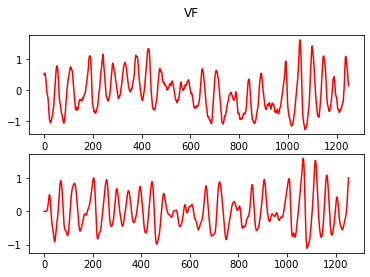

VF


In [46]:
import EMD
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.fftpack import fft , fftshift
from scipy.signal import butter, lfilter

from data_structure import EcgSignal, Annotation, Features

model = pickle.load(open('model.pkl', 'rb'))

Fs = 250
beta = 0.02 
alpha = 0.05                                                                # parameters used in paper
plot = True

featureRanking = [708,635,619,546,707,636,634,558,696,618,620,713,539,1882,559,551,543,692,542,703,1880,690,552,691,715,617,550,705,695,562,547,538,613,549,541,637,641,717,545,563,1883,711,698,1879,638,564,673,540,556,706,694,560,672,1889,616,631,582,712,561,1872,716,699,714,532,1890,702,581,709,1892,704,621,710,1873,589,553,665,623,548,1870,697,693,599,567,633,721,701,723,655,531,722,555,686,676,632,544,624,597,688,598,658,727,656,568,529,537,534,677,657,642,533,577,565,596,622,583,687,630,675,557,1888,554,1874,612,719,1871,1891,601,671,524,700,730,579,528,527,566,728,726,530,1881,587,725,603,600,647,651,639,569,578,1878,654,607,643,718,525,648,615,689,526,668,667,645,1884,611,729,536,685,653,535,570,679,571,731,608,678,629,683,523,575,522,606,602,650,684,604,720,664,586,609,674,576,595,724,652,580,590,681,1900,610,646,572,669,670,1862,628,585,584,626,625,680,1864,682,1876,644,588,605,1866,574,649,1902,666,1912,1885,1893,1886,1867,1869,1895,732,660,1898,1863,659,1875,1896,640,1861,573,1860,734,593,1899,733,520,1865,1877,594,519,1897,1918,1909,614,1850,1901,661,627,1851,1887,1919,735,521,1907,1853,663,1855,1835,736,1868,592,1844,1849,591,1894,1903,1858,1922,1843,662,1911,1836,1910,1904,1927,1834,1842,1840,1859,1838,1915,1839,1852,1920,1857,1926,1921,1856,1923,1928,1825,1914,1962,1908,1906,1933,1828,1952,1925,1847,739,1944,1854,1814,1930,1917,1940,1913,1826,1946,1983,518,1957,1786,1827,1779,1924,1823,1837,1905,516,1841,1929,1817,1945,1801,1807,1805,1982,1916,1845,1936,1963,1810,1934,1961,1941,1938,1846,1778,1848,1799,1815,1833,1820,1954,517,1788,1932,1790,1830,1948,1821,1942,1959,1798,1971,1984,1782,1943,1781,1785,1931,1980,1937,1829,1977,1939,1783,1978,1811,1819,1970,1953,1792,1791,1809,1967,1935,1794,1974,1950,1808,1986,1822,1972,1824,1804,1964,1955,1832,1774,1973,1949,1787,1803,1806,1812,1947,1968,1969,1960,738,1800,514,1813,1958,1816,1981,1773,1796,737,1795,1789,1802,1979,1784,1780,1775,1831,1793,1818,1976,1975,1965,1985,740,1988,1990,1797,1987,1966,1771,1991,1776,1951,1770,1989,1956,1777,513,515,1767,1993,1772,512,1997,1769,510,741,1768,742,1994,743,1766,1996,1992,1764,1765,2002,745,1762,1995,2000,746,511,1763,1761,1999,2001,744,1760,508,1998,2005,1759,509,1758,1755,748,2004,750,747,2003,2014,504,2006,749,2012,2007,503,2011,500,1757,501,753,506,2019,2008,2015,751,1756,507,505,2017,2009,1748,1754,1751,2016,752,2020,1753,2010,1750,1730,755,1749,495,1744,757,2018,491,498,499,1743,502,493,762,2013,488,1752,760,1731,2025,754,2026,1738,1740,494,1728,2037,2023,1746,2021,490,1741,1736,2024,497,779,1747,756,1732,2027,765,764,1745,777,2032,2043,1739,1733,761,2030,482,773,1721,1729,486,2036,2034,776,1742,2028,2031,778,489,2039,1737,759,758,496,769,771,1707,763,1726,781,767,770,2033,2044,2029,480,782,1724,475,477,766,2038,2035,774,786,1719,1735,476,1725,1717,1734,789,2057,483,1727,2022,484,1720,1700,1699,2054,1691,1723,473,2049,479,806,478,2055,2053,474,487,2064,467,1722,2063,492,1718,2045,457,481,1715,1708,471,785,780,775,2048,1702,1714,2056,446,1666,1686,2073,783,795,1705,1692,772,768,485,465,470,2042,469,1684,2059,472,2050,1716,2040,2079,1709,2041,461,447,804,2058,463,784,1694,793,1675,2085,1712,456,2060,788,828,464,1661,450,2062,1706,2070,468,448,1701,1711,787,2052,790,1696,437,794,1710,438,792,454,802,791,2087,2046,2047,796,2072,801,466,414,821,800,823,453,1638,462,812,797,1688,1685,1698,1687,1670,2066,807,1682,1697,1669,2095,1585,460,803,445,2061,829,2074,805,1676,426,2071,2094,830,422,826,2084,847,432,1713,2068,2083,2082,2076,441,2096,2051,449,1677,451,818,2089,857,1703,444,1679,813,439,2123,1627,1617,423,827,2069,430,2114,369,1668,848,1652,1695,455,2065,442,808,2081,2099,2107,832,835,404,1607,2088,839,406,1693,418,1641,854,1647,2080,1683,419,408,458,427,1690,1615,810,379,401,403,844,866,1689,842,2115,864,421,1678,443,902,433,2077,824,825,428,1662,440,878,862,1648,2159,2101,2067,1637,2100,831,2110,452,1663,407,1551,833,2078,425,2103,1632,871,459,2140,809,822,415,1658,2121,893,799,368,2086,851,2139,2104,798,1643,2172,1680,351,2146,811,836,867,409,837,384,424,815,429,1630,2144,1665,1655,1672,1623,1600,394,820,1634,869,888,2143,416,817,413,2097,2091,1633,850,2142,2167,2092,1704,434,2178,1552,397,1611,1571,819,436,391,2164,2075,2221,2162,431,1636,387,845,1575,1516,838,399,1601,894,1597,258,2137,816,382,892,2117,396,398,1650,1681,2113,2098,386,2122,2181,1548,1606,849,1592,1550,2109,2111,1619,2093,1664,1640,1671,2312,2090,1620,2108,1674,410,2128,1609,385,364,355,1584,2220,918,306,906,1639,1651,256,412,885,855,884,2170,814,2118,363,2195,1659,378,1667,1657,2190,1492,2145,970,245,2155,933,292,2169,395,1626,435,874,1557,890,2158,1613,1496,1621,402,2210,341,377,375,834,2152,2136,2337,1605,1572,927,1656,2116,411,352,405,860,1568,2232,265,907,1587,2124,929,1577,872,2138,299,1646,2188,881,1625,273,2126,2211,2134,917,318,915,911,2189,889,107,865,1653,1569,317,353,2157,870,1594,2132,2112,931,1570,876,858,877,979,1649,2125,856,356,1654,1472,301,1415,1603,903,320,904,914,2173,2193,14,1561,955,2102,334,85,852,1517,1586,1595,346,2133,1612,2176,846,1614,361,973,2129,330,948,190,2141,1616,925,853,2161,1122,327,175,2163,1581,985,875,1580,920,342,1644,1673,337,228,176,323,270,840,909,1596,310,170,1136,420,1033,1188,2236,1114,389,1543,343,1053,2179,359,1629,962,1158,896,2198,1017,2197,2166,923,305,1468,1598,991,1645,390,274,380,1511,1591,388,1041,932,1628,345,2435,374,2187,1125,2254,897,1459,163,2329,1554,1660,880,336,1567,251,1313,1558,1474,989,2183,308,2213,2127,309,938,357,2224,1527,347,239,381,2182,2200,887,2240,326,1504,67,344,372,1599,225,2185,1583,2206,1409,956,1530,859,1642,367,2106,354,1427,325,284,1396,1404,2332,1589,230,2212,1520,2105,1278,1255,936,2171,295,912,2223,242,339,1030,2135,2154,863,200,1539,898,1545,2248,2294,1379,1337,297,1284,919,2130,315,1056,2324,2322,148,843,841,2261,1325,895,2333,417,2177,2180,250,1555,1441,908,1010,1477,72,1624,883,2151,31,2119,2165,1172,1502,1063,2226,2252,861,1523,968,910,1367,1590,2269,951,1532,253,2205,1191,392,1544,1538,332,1430,208,930,93,1635,1559,281,939,1343,1381,288,2253,1476,2239,2149,272,921,978,958,1025,2264,286,1509,1424,1618,967,1443,2204,1064,1442,1490,941,882,983,2302,899,2383,50,2314,971,365,313,901,1062,1562,1370,254,1631,79,60,151,279,952,900,2160,1252,1001,296,1277,1508,960,873,236,2290,2321,1622,283,1096,2283,868,2208,1231,2282,2,1610,2156,2153,289,1299,333,1391,1540,1526,366,1406,2229,2432,321,1023,2274,1588,2207,975,147,218,1336,2131,247,1072,1564,331,1057,1094,2397,943,2336,1418,360,2194,999,2202,2191,1019,120,940,9,220,48,255,172,2218,2395,949,227,2219,1035,1541,1397,1507,1456,196,224,937,984,1352,130,2414,312,319,2168,924,1307,886,2228,112,1486,1579,152,1212,117,879,1049,201,44,1512,358,1265,1327,20,173,1578,2244,2230,1604,199,1018,2315,234,263,935,2203,1519,1267,1293,2338,1480,349,2448,1193,1308,1288,2243,187,1563,1011,1087,1306,1462,2443,186,959,1345,1020,905,1608,1383,2482,1510,1514,1259,88,233,2262,63,1573,202,2393,277,2147,2186,2394,11,2439,1009,2281,362,1478,1151,393,1159,2257,1433,2376,1333,252,39,183,1439,1421,1488,1218,174,1226,1042,311,1560,1470,1498,2300,2404,1574,1458,1407,1522,1521,1602,1047,2297,2233,1073,2372,1000,287,33,184,981,2227,45,1529,49,1565,2291,2309,2433,2459,2199,94,1518,988,1593,1334,232,1372,2467,2299,2485,1553,316,226,2237,2175,2473,953,97,2408,1416,2463,290,1378,280,1410,1043,119,1221,1061,300,229,348,262,1133,2287,1348,1266,350,2483,65,2216,2268,80,324,2504,1287,993,2217,1045,2456,158,1128,946,1491,2318,25,1388,957,1243,1119,1524,1067,1357,2280,1101,2475,1157,1300,1513,128,1129,197,2468,96,235,977,2429,373,109,1420,2201,1147,165,1203,223,1201,2266,2452,2428,1247,1292,2246,2457,1081,969,105,307,1422,1279,1405,2275,248,1234,1475,2455,21,995,2447,99,1166,1289,976,1280,1088,1127,298,92,2352,1097,1382,1,66,291,972,1195,1012,1024,944,1075,2305,303,257,947,1485,2184,166,1389,328,2150,2361,1039,2351,992,1174,81,1380,2298,104,1224,1423,961,1450,2354,1425,1398,2471,1451,340,2241,1412,2234,400,1145,322,1269,1031,2303,2500,1281,54,1535,1349,2247,1322,103,1438,221,1515,1058,1261,1484,1150,2469,222,1414,1091,2487,2270,269,1356,2272,1002,1181,2492,145,1235,1027,1497,1493,180,1556,891,1124,2392,159,2326,2449,1499,2255,282,1500,162,2286,371,2424,1431,62,1194,1495,1432,1106,1354,1108,1295,1143,1089,2308,249,1366,106,1457,980,1437,207,1310,275,1080,2289,1294,35,1312,2390,259,2222,2358,1103,1026,2265,2296,30,1549,1566,1347,169,1546,990,997,195,338,1173,2120,2196,1146,945,1107,111,2450,2215,2340,1060,2360,2363,189,203,2355,2346,1040,2426,89,1006,276,2259,1187,2380,191,1169,913,1547,2317,1321,137,2418,1013,1202,185,2389,1505,132,1355,926,1290,329,1246,78,8,1071,1359,963,2480,1156,2214,177,1171,42,314,209,954,264,2277,2279,302,1429,2301,1531,2347,12,2350,2502,950,58,2420,71,2148,1051,2311,2501,1339,1324,1447,1110,1206,1254,1285,1168,2313,1126,143,2465,2493,2484,206,2477,1440,2260,942,1537,1004,29,129,2386,1164,1007,994,982,1465,2405,1239,2293,1083,1419,2379,219,1098,2258,1434,2319,285,1399,2235,1328,1200,52,1038,2369,370,6,2343,1482,139,2339,2382,1054,2316,1197,1079,2310,1059,40,1452,215,2250,1092,135,1469,1426,70,7,126,1271,213,1034,2400,2192,98,121,212,1175,1466,2460,75,1182,1582,1483,1463,19,13,1274,1003,1446,965,2491,1536,2497,2446,1453,76,231,156,115,1375,1100,124,1140,102,16,1436,2486,987,1460,83,1210,108,2267,240,1095,1160,2334,2425,47,43,1360,916,1228,2370,1479,1090,293,383,4,1276,1326,1021,1046,59,1346,2325,1309,2436,68,198,2421,1222,1148,1296,2174,1283,2348,1189,161,1393,376,138,1272,1154,1263,1179,114,1185,134,46,1207,1286,1395,1183,1402,246,136,1115,1204,1155,2391,192,1230,3,27,2378,922,204,1363,1318,2396,0,1417,1048,2430,2225,260,1282,1242,2295,1223,1015,155,2496,1130,1467,244,1069,1317,1344,2341,1350,34,211,1403,1525,966,1134,2464,2330,2284,2387,2364,2245,1084,171,2451,194,1455,266,1576,84,160,2407,1102,1487,1501,1364,1268,1086,216,2278,1542,2359,1533,1394,1070,1338,1362,1167,1374,2209,131,1449,2434,2472,1016,278,15,1369,1093,2489,36,1052,2406,1534,2238,267,2365,217,1305,2388,1386,82,1068,2377,2498,157,964,110,268,2353,2438,928,153,90,1390,2307,1264,1481,2371,1244,5,2366,1245,2328,1078,2494,2437,1273,1236,1319,2345,51,1152,2384,1270,2327,243,1506,1022,2304,1473,2344,1044,95,1304,1528,1262,164,146,2368,1298,1029,23,1248,2427,1121,32,2476,141,1342,2412,1065,238,1120,304,1109,1260,1413,1335,1229,1216,2444,1361,1331,1190,1014,1316,1489,1341,2331,2292,113,1005,1050,1184,974,2306,1444,18,1400,1232,1385,1192,1320,2256,1503,1163,2342,2285,335,241,1123,1258,1445,2507,986,1099,1387,140,1353,1032,1249,41,1464,55,2288,2490,1217,1297,2454,1220,2398,1301,125,2445,188,1085,1213,2431,193,150,1116,1384,1165,61,1237,2251,1471,2273,1074,1138,1077,1214,182,2419,1302,2335,74,122,24,294,2499,178,261,1066,1198,69,1368,2367,2271,2401,210,1392,1036,1008,1141,1227,1186,91,1104,1205,167,1238,1448,1117,2416,1323,1365,1149,2505,1170,1112,2415,1082,1209,1211,2403,2385,1315,1208,2495,10,1371,2488,86,2231,149,1113,1037,142,133,1105,1408,168,1257,2411,2356,1256,2323,2375,1177,22,17,1180,100,2481,1332,2249,2441,2478,1330,1215,1199,1411,2453,1144,2423,1196,53,154,1131,214,271,2362,1314,2410,1376,934,1428,26,116,101,1303,1111,1250,2242,2417,1028,1162,1225,123,77,127,1161,1329,144,2320,1454,1176,2263,2479,2470,1076,73,1118,2440,2474,179,2357,1241,64,37,1358,1340,2462,38,2409,118,1373,1435,2349,1494,2399,205,56,1275,2461,181,2374,996,2276,2466,1240,2503,1253,1153,1311,2373,237,2442,2458,1142,998,2413,57,1178,1055,1351,1132,2402,1401,1251,1461,2381,28,1135,2506,1233,1137,2422,1219,1291,1139,87,1377]
featureRanking = np.array(featureRanking)

# NotVf = [-0.64,-0.91,-0.935,-0.93,-0.935,-0.955,-0.95,-0.95,-0.94,-0.925,-0.89,-0.87,-0.83,-0.8,-0.745,-0.695,-0.635,-0.57,-0.505,-0.43,-0.415,-0.39,-0.36,-0.35,-0.335,-0.32,-0.285,-0.25,-0.245,-0.24,-0.245,-0.24,-0.22,-0.225,-0.185,-0.155,-0.155,-0.14,-0.14,-0.13,-0.13,-0.13,-0.09,-0.095,-0.05,-0.04,-0.035,-0.05,-0.03,0.0,0.015,0.035,0.07,0.08,0.09,0.09,0.085,0.1,0.11,0.145,0.17,0.14,0.145,0.15,0.105,0.09,0.055,0.035,0.0,-0.01,-0.03,-0.045,-0.105,-0.13,-0.155,-0.145,-0.19,-0.19,-0.18,-0.215,-0.23,-0.26,-0.285,-0.3,-0.31,-0.335,-0.355,-0.39,-0.43,-0.445,-0.49,-0.47,-0.475,-0.485,-0.475,-0.475,-0.495,-0.52,-0.53,-0.545,-0.56,-0.535,-0.54,-0.525,-0.535,-0.57,-0.58,-0.57,-0.58,-0.555,-0.56,-0.545,-0.565,-0.55,-0.585,-0.585,-0.59,-0.58,-0.565,-0.53,-0.515,-0.56,-0.555,-0.58,-0.56,-0.525,-0.475,-0.46,-0.44,-0.49,-0.5,-0.6,-0.725,-0.845,-0.955,-1.03,-1.07,-1.105,-1.11,-1.145,-1.18,-1.135,-1.13,-1.08,-1.045,-1.06,-1.05,-1.015,-0.995,-0.95,-0.9,-0.815,-0.73,-0.685,-0.64,-0.615,-0.585,-0.565,-0.5,-0.46,-0.41,-0.375,-0.36,-0.355,-0.345,-0.35,-0.33,-0.29,-0.25,-0.22,-0.205,-0.225,-0.22,-0.195,-0.185,-0.16,-0.12,-0.095,-0.105,-0.08,-0.06,-0.075,-0.05,-0.035,0.0,0.025,0.06,0.1,0.09,0.08,0.075,0.115,0.13,0.155,0.155,0.175,0.165,0.145,0.125,0.1,0.07,0.065,0.075,0.055,0.04,0.005,-0.05,-0.075,-0.085,-0.11,-0.095,-0.1,-0.12,-0.155,-0.16,-0.18,-0.205,-0.225,-0.225,-0.24,-0.28,-0.315,-0.345,-0.385,-0.385,-0.38,-0.38,-0.38,-0.365,-0.38,-0.4,-0.41,-0.41,-0.41,-0.425,-0.4,-0.41,-0.415,-0.41,-0.44,-0.46,-0.44,-0.455,-0.405,-0.425,-0.4,-0.44,-0.46,-0.51,-0.49,-0.48,-0.455,-0.43,-0.43,-0.45,-0.455,-0.485,-0.47,-0.44,-0.405,-0.36,-0.365,-0.38,-0.44,-0.515,-0.63,-0.755,-0.87,-0.98,-1.02,-1.05,-1.08,-1.09,-1.125,-1.125,-1.105,-1.09,-1.055,-1.045,-1.025,-1.01,-1.03,-0.995,-0.94,-0.91,-0.815,-0.765,-0.72,-0.68,-0.64,-0.615,-0.575,-0.53,-0.47,-0.43,-0.42,-0.4,-0.405,-0.385,-0.355,-0.35,-0.32,-0.28,-0.275,-0.25,-0.245,-0.26,-0.25,-0.21,-0.2,-0.16,-0.13,-0.115,-0.12,-0.15,-0.12,-0.09,-0.07,-0.055,-0.02,0.0,0.01,0.015,0.0,0.025,0.04,0.085,0.135,0.15,0.14,0.14,0.1,0.105,0.115,0.105,0.12,0.1,0.09,0.055,0.055,0.035,0.025,0.02,0.005,-0.045,-0.12,-0.175,-0.245,-0.29,-0.37,-0.48,-0.605,-0.74,-0.85,-0.985,-1.07,-1.165,-1.22,-1.22,-1.21,-1.2,-1.21,-1.24,-1.265,-1.265,-1.28,-1.24,-1.185,-1.125,-1.09,-1.06,-1.06,-1.025,-1.025,-0.995,-0.98,-0.925,-0.865,-0.805,-0.76,-0.7,-0.615,-0.565,-0.42,-0.35,-0.27,-0.215,-0.185,-0.145,-0.125,-0.105,-0.07,-0.015,0.035,0.095,0.125,0.15,0.185,0.195,0.235,0.255,0.305,0.34,0.38,0.39,0.395,0.385,0.425,0.44,0.465,0.47,0.485,0.45,0.42,0.405,0.385,0.36,0.38,0.38,0.36,0.35,0.305,0.28,0.235,0.235,0.215,0.21,0.2,0.175,0.165,0.125,0.085,0.065,0.055,0.05,0.055,0.05,0.05,0.02,0.0,-0.025,-0.03,-0.005,-0.01,0.0,-0.01,-0.02,-0.065,-0.075,-0.045,-0.045,-0.025,0.0,-0.02,-0.02,-0.035,-0.05,-0.05,-0.045,-0.045,-0.02,0.0,0.015,0.0,-0.01,-0.015,-0.005,0.035,0.045,0.05,0.065,0.035,0.005,-0.04,-0.025,-0.01,-0.005,-0.015,-0.015,-0.05,-0.04,-0.095,-0.075,-0.085,-0.07,-0.055,-0.075,-0.075,-0.105,-0.11,-0.155,-0.17,-0.23,-0.21,-0.2,-0.225,-0.235,-0.245,-0.275,-0.28,-0.295,-0.28,-0.27,-0.275,-0.28,-0.315,-0.335,-0.335,-0.32,-0.315,-0.305,-0.31,-0.31,-0.345,-0.345,-0.365,-0.345,-0.365,-0.345,-0.34,-0.34,-0.36,-0.36,-0.37,-0.365,-0.37,-0.375,-0.345,-0.335,-0.33,-0.315,-0.335,-0.325,-0.34,-0.33,-0.345,-0.39,-0.485,-0.61,-0.715,-0.855,-0.91,-0.955,-0.985,-0.975,-1.015,-1.06,-1.07,-1.06,-1.045,-1.04,-1.03,-1.03,-1.015,-0.995,-0.96,-0.955,-0.915,-0.845,-0.785,-0.7,-0.64,-0.61,-0.59,-0.565,-0.55,-0.545,-0.49,-0.45,-0.425,-0.41,-0.425,-0.405,-0.39,-0.38,-0.36,-0.35,-0.33,-0.31,-0.3,-0.305,-0.315,-0.29,-0.285,-0.25,-0.22,-0.205,-0.21,-0.205,-0.215,-0.205,-0.175,-0.17,-0.135,-0.105,-0.09,-0.095,-0.08,-0.095,-0.06,-0.055,0.0,0.0,0.0,0.005,0.0,-0.035,-0.06,-0.06,-0.045,-0.065,-0.08,-0.09,-0.095,-0.145,-0.18,-0.19,-0.185,-0.19,-0.175,-0.205,-0.24,-0.25,-0.275,-0.28,-0.315,-0.33,-0.355,-0.375,-0.395,-0.425,-0.46,-0.49,-0.47,-0.465,-0.475,-0.465,-0.485,-0.51,-0.525,-0.55,-0.53,-0.53,-0.53,-0.51,-0.505,-0.515,-0.53,-0.555,-0.555,-0.55,-0.53,-0.48,-0.49,-0.485,-0.505,-0.52,-0.52,-0.495,-0.52,-0.49,-0.47,-0.475,-0.475,-0.495,-0.47,-0.455,-0.46,-0.445,-0.45,-0.495,-0.555,-0.65,-0.79,-0.895,-1.01,-1.06,-1.105,-1.145,-1.19,-1.19,-1.225,-1.24,-1.24,-1.175,-1.18,-1.15,-1.14,-1.14,-1.155,-1.125,-1.09,-1.03,-0.955,-0.88,-0.84,-0.79,-0.77,-0.755,-0.72,-0.695,-0.65,-0.625,-0.61,-0.58,-0.595,-0.61,-0.605,-0.585,-0.57,-0.515,-0.525,-0.5,-0.53,-0.505,-0.5,-0.5,-0.455,-0.45,-0.395,-0.41,-0.415,-0.395,-0.4,-0.385,-0.35,-0.285,-0.27,-0.25,-0.26,-0.24,-0.24,-0.23,-0.2,-0.16,-0.155,-0.12,-0.12,-0.11,-0.145,-0.155,-0.155,-0.15,-0.15,-0.16,-0.185,-0.21,-0.24,-0.285,-0.3,-0.295,-0.31,-0.295,-0.3,-0.345,-0.35,-0.37,-0.38,-0.42,-0.39,-0.43,-0.445,-0.47,-0.5,-0.53,-0.555,-0.56,-0.555,-0.56,-0.545,-0.56,-0.565,-0.59,-0.605,-0.62,-0.615,-0.59,-0.59,-0.58,-0.58,-0.63,-0.625,-0.645,-0.63,-0.635,-0.595,-0.6,-0.625,-0.64,-0.64,-0.66,-0.67,-0.635,-0.615,-0.6,-0.605,-0.605,-0.61,-0.62,-0.64,-0.62,-0.58,-0.57,-0.56,-0.605,-0.625,-0.68,-0.725,-0.795,-0.885,-0.97,-1.07,-1.14,-1.195,-1.24,-1.25,-1.26,-1.265,-1.245,-1.225,-1.205,-1.215,-1.2,-1.235,-1.195,-1.165,-1.09,-1.03,-0.985,-0.935,-0.89,-0.86,-0.815,-0.78,-0.705,-0.645,-0.605,-0.58,-0.58,-0.575,-0.565,-0.56,-0.5,-0.47,-0.45,-0.43,-0.43,-0.42,-0.435,-0.41,-0.37,-0.33,-0.295,-0.27,-0.26,-0.255,-0.27,-0.265,-0.24,-0.215,-0.175,-0.14,-0.115,-0.11,-0.095,-0.105,-0.075,-0.04,-0.02,0.015,0.035,0.035,0.005,-0.005,0.005,0.0,0.0,0.0,-0.02,-0.045,-0.05,-0.1,-0.125,-0.145,-0.15,-0.145,-0.155,-0.165,-0.19,-0.245,-0.26,-0.28,-0.26,-0.265,-0.27,-0.305,-0.36,-0.4,-0.42,-0.425,-0.43,-0.435,-0.445,-0.415,-0.445,-0.425,-0.485,-0.485,-0.465,-0.455,-0.46,-0.435,-0.46,-0.46,-0.48,-0.505,-0.515,-0.48,-0.45,-0.455,-0.47,-0.475,-0.46,-0.515,-0.505,-0.485,-0.48,-0.47,-0.47,-0.48,-0.47,-0.49,-0.475,-0.455,-0.445,-0.415,-0.39,-0.43,-0.465,-0.505,-0.53,-0.59,-0.64,-0.74,-0.81,-0.89,-0.96,-1.005,-1.045,-1.05,-1.07,-1.05,-1.055,-1.04,-1.025,-1.04,-1.045,-1.025,-1.025,-0.985,-0.93,-0.875,-0.825,-0.785,-0.735,-0.69,-0.64,-0.585,-0.565,-0.495,-0.465,-0.46,-0.425,-0.4,-0.385,-0.375,-0.355,-0.315,-0.295,-0.275,-0.26,-0.27,-0.265,-0.215,-0.2,-0.175,-0.145,-0.135,-0.14,-0.15,-0.115,-0.11,-0.1,-0.065,-0.04,-0.025,-0.005,-0.03,0.0,0.0,0.03,0.055,0.09,0.095,0.09,0.085,0.04,0.05,0.025,0.025,0.005,0.02,-0.035,-0.05,-0.09,-0.125,-0.16,-0.175,-0.195,-0.2,-0.23,-0.26,-0.295,-0.325,-0.33,-0.365,-0.35,-0.38,-0.395,-0.46,-0.485,-0.53,-0.545,-0.545,-0.54,-0.545,-0.53,-0.54,-0.575,-0.595,-0.61,-0.605,-0.62,-0.61,-0.6,-0.595,-0.605,-0.62,-0.62,-0.64,-0.62,-0.63,-0.6,-0.59,-0.605,-0.625,-0.64,-0.63,-0.615,-0.625,-0.595,-0.575,-0.57,-0.575,-0.6,-0.6,-0.57,-0.525,-0.505,-0.51,-0.515,-0.54,-0.565,-0.61,-0.65,-0.71,-0.795,-0.87,-0.93,-0.98,-1.0,-1.055,-1.065,-1.08,-1.085,-1.07,-1.045,-1.045,-1.04,-1.04,-1.065,-1.045,-0.995,-0.97,-0.925,-0.875,-0.845,-0.83,-0.795,-0.75,-0.72,-0.685,-0.615,-0.555,-0.555,-0.535,-0.5,-0.465,-0.46,-0.43,-0.405,-0.375,-0.38,-0.365,-0.355,-0.36,-0.355,-0.33,-0.255,-0.24,-0.215,-0.235,-0.23,-0.23,-0.22,-0.16,-0.14,-0.12,-0.1,-0.11,-0.1,-0.11,-0.1,-0.065,-0.06,-0.005,0.0,0.02,0.015,0.025,0.025,0.055,0.07,0.055,0.07,0.06,0.04,0.02,-0.01,-0.04,-0.04,-0.065,-0.05,-0.08,-0.12,-0.135,-0.155,-0.175,-0.19,-0.195,-0.2,-0.215,-0.245,-0.26,-0.28,-0.32,-0.35,-0.375,-0.38,-0.375,-0.4,-0.405,-0.425,-0.45,-0.455,-0.455,-0.44,-0.435,-0.44,-0.465,-0.475,-0.49,-0.465,-0.49,-0.495,-0.47,-0.465,-0.495,-0.49,-0.5,-0.51,-0.525,-0.535,-0.495,-0.495,-0.49,-0.505,-0.52,-0.535,-0.525,-0.53,-0.515,-0.495,-0.485,-0.495,-0.48,-0.48,-0.495,-0.5,-0.535,-0.53,-0.61,-0.67,-0.77,-0.865,-0.955,-1.015,-1.035,-1.04,-1.04,-1.045,-1.065,-1.095,-1.095,-1.095,-1.075,-1.055,-1.04,-1.015,-1.005,-1.005,-0.98,-0.93,-0.895,-0.825,-0.775,-0.71,-0.655,-0.63,-0.62,-0.605,-0.575,-0.55,-0.485,-0.46,-0.48,-0.46,-0.46,-0.465,-0.455]
NotVf = [-0.04,-0.04,-0.095,-0.105,-0.075,-0.07,-0.06,-0.065,-0.065,-0.07,-0.11,-0.075,-0.105,-0.105,-0.175,-0.13,-0.1,-0.13,-0.175,-0.22,-0.21,-0.205,-0.215,-0.26,-0.23,-0.275,-0.345,-0.385,-0.4,-0.36,-0.385,-0.29,-0.31,-0.425,-0.32,-0.365,-0.37,-0.3,-0.305,-0.29,-0.265,-0.265,-0.28,-0.245,-0.135,-0.02,0.065,0.15,0.26,0.34,0.315,0.3,0.275,0.2,0.245,0.225,0.22,0.18,0.195,0.315,0.11,-0.025,-0.02,-0.015,-0.135,-0.135,-0.115,-0.165,-0.195,-0.23,-0.215,-0.2,-0.22,-0.22,-0.235,-0.205,-0.17,-0.265,-0.18,-0.18,-0.17,-0.185,-0.18,-0.15,-0.17,-0.26,-0.395,-0.54,-0.8,-1.08,-1.31,-1.375,-0.995,-0.36,0.275,0.91,1.545,2.18,2.815,3.45,4.085,4.605,3.965,3.325,2.685,2.045,1.405,0.765,0.125,-0.38,-0.43,-0.475,-0.45,-0.515,-0.56,-0.53,-0.535,-0.55,-0.54,-0.525,-0.56,-0.55,-0.59,-0.6,-0.55,-0.535,-0.57,-0.605,-0.585,-0.58,-0.62,-0.53,-0.56,-0.525,-0.525,-0.51,-0.53,-0.5,-0.455,-0.405,-0.385,-0.36,-0.41,-0.325,-0.25,-0.27,-0.25,-0.185,-0.13,-0.085,-0.085,-0.07,-0.06,-0.05,-0.03,-0.005,0.015,0.045,0.02,-0.025,0.055,0.105,0.1,0.05,0.06,0.06,0.035,0.07,0.065,0.095,0.065,0.045,0.065,0.01,0.02,0.025,0.05,0.045,0.025,0.045,0.005,-0.03,-0.05,-0.06,-0.055,-0.125,-0.12,-0.12,-0.125,-0.15,-0.2,-0.2,-0.225,-0.255,-0.24,-0.245,-0.26,-0.25,-0.25,-0.25,-0.235,-0.25,-0.23,-0.175,-0.165,-0.18,-0.135,-0.065,0.045,0.175,0.27,0.37,0.445,0.395,0.36,0.36,0.355,0.285,0.305,0.315,0.315,0.265,0.235,0.14,0.065,-0.02,-0.045,-0.055,-0.115,-0.105,-0.1,-0.105,-0.12,-0.075,-0.11,-0.105,-0.14,-0.11,-0.12,-0.115,-0.125,-0.145,-0.125,-0.135,-0.235,-0.18,-0.17,-0.22,-0.335,-0.465,-0.705,-0.995,-1.22,-1.325,-1.065,-0.43,0.205,0.84,1.475,2.11,2.745,3.38,4.015,4.65,4.01,3.37,2.73,2.09,1.45,0.81,0.17,-0.42,-0.39,-0.465,-0.51,-0.5,-0.525,-0.53,-0.545,-0.525,-0.545,-0.54,-0.5,-0.53,-0.68,-0.77,-0.635,-0.615,-0.6,-0.56,-0.635,-0.625,-0.56,-0.53,-0.59,-0.545,-0.5,-0.53,-0.485,-0.49,-0.5,-0.38,-0.345,-0.36,-0.35,-0.31,-0.41,-0.445,-0.255,-0.185,-0.145,-0.06,-0.08,-0.07,-0.055,-0.03,0.005,0.015,0.045,0.09,0.04,0.04,0.09,0.105,0.155,0.19,0.07,0.07,0.095,0.105,0.085,0.115,0.135,0.085,0.08,0.11,0.145,0.145,0.065,0.08,-0.01,-0.025,-0.015,-0.04,-0.04,-0.095,-0.14,-0.165,-0.14,-0.175,-0.205,-0.245,-0.245,-0.29,-0.27,-0.265,-0.335,-0.32,-0.32,-0.31,-0.32,-0.335,-0.32,-0.265,-0.235,-0.205,-0.145,-0.04,0.06,0.18,0.34,0.385,0.38,0.36,0.325,0.275,0.24,0.21,0.265,0.31,0.265,0.165,0.13,0.11,-0.005,-0.055,-0.1,-0.125,-0.155,-0.175,-0.19,-0.22,-0.22,-0.19,-0.13,-0.175,-0.19,-0.14,-0.14,-0.16,-0.16,-0.19,-0.18,-0.125,-0.2,-0.225,-0.27,-0.425,-0.805,-1.005,-1.1,-1.355,-1.305,-0.845,-0.21,0.425,1.06,1.695,2.33,2.965,3.6,4.235,4.545,3.905,3.265,2.625,1.985,1.345,0.705,0.065,-0.47,-0.53,-0.53,-0.585,-0.535,-0.52,-0.49,-0.53,-0.585,-0.625,-0.63,-0.635,-0.635,-0.65,-0.67,-0.68,-0.685,-0.71,-0.715,-0.725,-0.705,-0.705,-0.76,-0.685,-0.65,-0.685,-0.705,-0.705,-0.615,-0.525,-0.48,-0.5,-0.495,-0.46,-0.405,-0.325,-0.385,-0.42,-0.345,-0.345,-0.37,-0.265,-0.265,-0.175,-0.145,-0.145,-0.135,-0.155,-0.205,-0.15,-0.085,-0.1,-0.035,-0.04,0.01,-0.015,-0.1,-0.145,-0.19,-0.115,-0.045,-0.025,0.02,0.01,-0.06,-0.085,-0.15,-0.17,-0.15,-0.1,-0.14,-0.155,-0.15,-0.12,-0.16,-0.25,-0.255,-0.24,-0.26,-0.295,-0.45,-0.605,-0.475,-0.425,-0.4,-0.33,-0.305,-0.34,-0.35,-0.365,-0.35,-0.37,-0.325,-0.34,-0.31,-0.225,-0.22,-0.285,-0.19,-0.055,0.0,0.095,0.155,0.155,0.14,0.275,0.405,0.35,0.295,0.29,0.23,0.125,0.185,0.2,0.13,0.04,-0.015,-0.065,-0.085,-0.125,-0.09,-0.09,-0.085,-0.175,-0.31,-0.255,-0.205,-0.23,-0.175,-0.135,-0.04,-0.11,-0.14,-0.11,-0.16,-0.185,-0.12,-0.09,-0.135,-0.22,-0.28,-0.41,-0.615,-0.905,-1.225,-1.315,-0.84,-0.205,0.43,1.065,1.7,2.335,2.97,3.605,4.24,4.875,4.385,3.745,3.105,2.465,1.825,1.185,0.545,-0.095,-0.3,-0.335,-0.395,-0.415,-0.42,-0.485,-0.485,-0.48,-0.5,-0.44,-0.435,-0.47,-0.51,-0.5,-0.46,-0.505,-0.54,-0.575,-0.575,-0.545,-0.52,-0.535,-0.535,-0.5,-0.51,-0.555,-0.505,-0.585,-0.52,-0.495,-0.485,-0.4,-0.38,-0.425,-0.375,-0.35,-0.33,-0.275,-0.265,-0.235,-0.185,-0.145,-0.11,-0.125,-0.105,-0.095,-0.1,-0.095,-0.065,-0.045,-0.04,-0.015,0.005,0.035,0.015,-0.035,-0.02,-0.005,-0.025,-0.025,0.035,0.035,0.035,0.005,-0.005,-0.02,-0.005,0.0,0.0,-0.035,-0.05,-0.03,-0.08,-0.11,-0.095,-0.095,-0.13,-0.11,-0.145,-0.2,-0.225,-0.21,-0.215,-0.23,-0.27,-0.255,-0.29,-0.315,-0.29,-0.25,-0.25,-0.265,-0.305,-0.265,-0.22,-0.205,-0.155,-0.145,-0.08,-0.05,0.0,0.105,0.21,0.27,0.38,0.465,0.47,0.395,0.41,0.365,0.32,0.3,0.305,0.355,0.29,0.22,0.175,0.06,0.03,0.0,-0.05,-0.07,-0.105,-0.11,-0.14,-0.13,-0.155,-0.15,-0.13,-0.175,-0.175,-0.19,-0.12,-0.125,-0.155,-0.155,-0.14,-0.14,-0.145,-0.15,-0.255,-0.35,-0.46,-0.665,-0.96,-1.165,-1.36,-1.205,-0.71,-0.075,0.56,1.195,1.83,2.465,3.1,3.735,4.37,3.995,3.355,2.715,2.075,1.435,0.795,0.155,-0.35,-0.415,-0.41,-0.465,-0.475,-0.52,-0.505,-0.51,-0.52,-0.545,-0.53,-0.545,-0.535,-0.555,-0.565,-0.575,-0.605,-0.62,-0.6,-0.6,-0.595,-0.59,-0.6,-0.55,-0.555,-0.515,-0.515,-0.5,-0.5,-0.46,-0.465,-0.39,-0.4,-0.37,-0.285,-0.3,-0.27,-0.225,-0.21,-0.185,-0.185,-0.13,-0.085,-0.085,-0.09,-0.065,-0.035,-0.045,-0.06,-0.015,0.005,0.035,0.01,-0.01,0.005,0.01,-0.02,0.005,0.01,0.035,0.045,0.025,0.025,0.0,-0.01,0.005,-0.015,-0.02,-0.035,-0.085,-0.05,-0.075,-0.08,-0.08,-0.12,-0.15,-0.175,-0.195,-0.225,-0.265,-0.28,-0.275,-0.3,-0.29,-0.3,-0.33,-0.3,-0.325,-0.36,-0.33,-0.31,-0.295,-0.26,-0.225,-0.245,-0.145,-0.085,0.085,0.185,0.26,0.365,0.32,0.315,0.275,0.28,0.245,0.225,0.24,0.255,0.23,0.21,0.09,0.045,-0.035,-0.075,-0.105,-0.14,-0.14,-0.15,-0.16,-0.185,-0.185,-0.22,-0.19,-0.15,-0.2,-0.2,-0.185,-0.205,-0.16,-0.155,-0.17,-0.17,-0.17,-0.16,-0.17,-0.31,-0.445,-0.58,-0.795,-1.06,-1.29,-1.285,-0.785,-0.15,0.485,1.12,1.755,2.39,3.025,3.66,4.295,4.035,3.395,2.755,2.115,1.475,0.835,0.195,-0.38,-0.405,-0.485,-0.475,-0.5,-0.55,-0.535,-0.545,-0.54,-0.545,-0.565,-0.565,-0.57,-0.655,-0.63,-0.62,-0.61,-0.61,-0.62,-0.67,-0.625,-0.615,-0.615,-0.585,-0.585,-0.585,-0.605,-0.535,-0.485,-0.49,-0.48,-0.43,-0.35,-0.355,-0.31,-0.27,-0.24,-0.2,-0.2,-0.11,-0.125,-0.135,-0.09,-0.095,-0.1,-0.025,0.005,-0.04,-0.06,-0.025,-0.01,-0.02,-0.035,-0.03,-0.025,-0.025,-0.105,-0.085,-0.065,-0.04,-0.02,-0.05,-0.06,-0.09,-0.07,-0.03,-0.055,-0.115,-0.115,-0.115,-0.075,-0.01,-0.15,-0.2,-0.245,-0.27,-0.26,-0.29,-0.345,-0.35,-0.345,-0.355,-0.38,-0.44,-0.42,-0.415,-0.455,-0.45,-0.455,-0.44,-0.43,-0.385,-0.395,-0.47,-0.41,-0.315,-0.22,-0.115,0.0,0.085,0.2,0.195,0.19,0.205,0.175,0.12,0.09,0.1,0.125,0.155,0.055,0.04,-0.025,-0.07,-0.145,-0.15,-0.175,-0.17,-0.235,-0.27,-0.325,-0.35,-0.285,-0.28,-0.31,-0.29,-0.28,-0.32,-0.3,-0.245,-0.24,-0.3,-0.285,-0.29,-0.295,-0.355,-0.435,-0.58,-0.7,-0.935,-1.26,-1.475,-1.34,-0.8,-0.165,0.47,1.105,1.74,2.375,3.01,3.645,4.28,4.315,3.675,3.035,2.395,1.755,1.115,0.475,-0.165,-0.53,-0.59,-0.67,-0.695,-0.64,-0.625,-0.61,-0.605,-0.675,-0.695,-0.68,-0.68,-0.685,-0.7,-0.72,-0.71,-0.715,-0.745,-0.72,-0.775,-0.75,-0.74,-0.685,-0.69,-0.69,-0.69,-0.67,-0.71,-0.69,-0.65,-0.615,-0.505,-0.54,-0.55,-0.485,-0.405,-0.425,-0.4,-0.32,-0.265,-0.295,-0.34,-0.35,-0.32,-0.31,-0.235,-0.19,-0.165,-0.16,-0.17,-0.125,-0.115,-0.095,-0.105,-0.11,-0.115,-0.105,-0.105,-0.13,-0.1,-0.07,-0.04,-0.025,-0.005,-0.045,-0.1,-0.14,-0.155,-0.14,-0.15,-0.16,-0.155,-0.14,-0.11,-0.135,-0.13,-0.2,-0.195,-0.195,-0.24,-0.28,-0.28,-0.325,-0.36,-0.35,-0.38,-0.38,-0.37,-0.34,-0.32,-0.295,-0.29,-0.305,-0.29,-0.285,-0.235,-0.235,-0.25,-0.22,-0.175,0.0,0.14,0.255,0.385,0.395,0.44,0.365,0.325,0.25,0.22,0.255,0.23,0.245,0.225,0.2,0.195,0.125,0.07,0.02,-0.07,-0.175,-0.185,-0.165,-0.13,-0.165,-0.18,-0.19,-0.17,-0.19,-0.155,-0.175,-0.25,-0.045,-0.135,-0.22,-0.175,-0.11,-0.215,-0.155,-0.12,-0.34,-0.555,-0.625,-0.88,-1.05,-1.24,-1.285,-0.89,-0.255,0.38,1.015,1.65,2.285,2.92,3.555,4.19,4.825,4.185,3.545,2.905,2.265,1.625,0.985,0.345,-0.26,-0.345,-0.355,-0.41,-0.48,-0.48,-0.515,-0.53,-0.55]
Vf = [0.505,0.55,0.51,0.53,0.49,0.455,0.4,0.36,0.28,0.165,0.045,-0.04,-0.13,-0.155,-0.19,-0.22,-0.27,-0.375,-0.495,-0.64,-0.77,-0.86,-0.97,-0.98,-1.025,-1.055,-1.065,-1.055,-1.035,-1.01,-0.96,-0.915,-0.87,-0.855,-0.82,-0.765,-0.715,-0.655,-0.59,-0.515,-0.395,-0.26,-0.14,-0.015,0.11,0.2,0.305,0.415,0.525,0.63,0.715,0.75,0.785,0.79,0.755,0.715,0.63,0.525,0.4,0.245,0.075,-0.09,-0.255,-0.33,-0.38,-0.435,-0.465,-0.505,-0.575,-0.66,-0.695,-0.755,-0.76,-0.805,-0.83,-0.865,-0.9,-0.97,-1.005,-1.045,-1.055,-1.07,-1.035,-1.005,-0.93,-0.865,-0.78,-0.69,-0.58,-0.48,-0.345,-0.225,-0.135,-0.04,0.035,0.12,0.17,0.245,0.315,0.365,0.415,0.475,0.505,0.54,0.59,0.65,0.7,0.725,0.755,0.745,0.74,0.685,0.69,0.66,0.645,0.61,0.575,0.485,0.38,0.275,0.165,0.06,-0.03,-0.105,-0.19,-0.285,-0.4,-0.5,-0.585,-0.61,-0.645,-0.625,-0.57,-0.555,-0.585,-0.605,-0.64,-0.65,-0.63,-0.6,-0.55,-0.505,-0.455,-0.375,-0.37,-0.33,-0.305,-0.31,-0.32,-0.305,-0.315,-0.31,-0.335,-0.355,-0.35,-0.33,-0.305,-0.265,-0.28,-0.245,-0.255,-0.24,-0.215,-0.185,-0.16,-0.15,-0.115,-0.1,-0.09,-0.08,-0.01,0.055,0.115,0.155,0.21,0.28,0.35,0.425,0.475,0.53,0.625,0.69,0.83,0.925,1.045,1.065,1.1,1.11,1.11,1.095,1.085,1.01,0.855,0.67,0.5,0.255,0.005,-0.22,-0.36,-0.46,-0.505,-0.55,-0.585,-0.6,-0.675,-0.67,-0.705,-0.685,-0.73,-0.735,-0.725,-0.74,-0.725,-0.7,-0.68,-0.635,-0.605,-0.585,-0.565,-0.53,-0.49,-0.395,-0.3,-0.22,-0.13,-0.07,-0.015,0.025,0.07,0.16,0.29,0.435,0.525,0.61,0.65,0.71,0.765,0.85,0.95,1.045,1.125,1.16,1.125,0.99,0.895,0.76,0.65,0.585,0.505,0.395,0.285,0.155,0.015,-0.07,-0.16,-0.185,-0.23,-0.255,-0.26,-0.28,-0.32,-0.335,-0.355,-0.345,-0.32,-0.29,-0.26,-0.25,-0.21,-0.175,-0.11,-0.035,0.07,0.165,0.27,0.37,0.48,0.545,0.655,0.72,0.82,0.86,0.87,0.855,0.82,0.785,0.685,0.62,0.605,0.58,0.55,0.475,0.41,0.325,0.28,0.26,0.185,0.11,0.05,0.02,-0.05,-0.105,-0.165,-0.215,-0.265,-0.275,-0.26,-0.23,-0.215,-0.205,-0.21,-0.175,-0.14,-0.11,-0.04,0.01,0.08,0.125,0.175,0.25,0.31,0.39,0.485,0.54,0.61,0.675,0.75,0.77,0.81,0.835,0.87,0.885,0.895,0.88,0.855,0.81,0.775,0.725,0.675,0.595,0.54,0.445,0.405,0.315,0.26,0.195,0.145,0.08,0.055,0.035,-0.01,0.005,-0.03,-0.055,-0.045,-0.02,0.0,0.015,0.015,0.055,0.05,0.075,0.12,0.165,0.235,0.27,0.325,0.34,0.385,0.455,0.55,0.685,0.805,0.915,1.035,1.09,1.125,1.1,1.085,1.07,1.09,1.075,1.08,1.06,1.01,0.93,0.795,0.685,0.56,0.455,0.355,0.275,0.215,0.145,0.065,-0.005,-0.07,-0.13,-0.17,-0.215,-0.26,-0.305,-0.33,-0.345,-0.34,-0.285,-0.25,-0.195,-0.15,-0.105,-0.05,-0.01,0.08,0.16,0.265,0.38,0.475,0.555,0.635,0.715,0.79,0.905,1.035,1.135,1.245,1.295,1.325,1.325,1.345,1.33,1.315,1.255,1.18,1.07,0.925,0.745,0.57,0.325,0.105,-0.03,-0.145,-0.21,-0.295,-0.375,-0.48,-0.54,-0.57,-0.6,-0.63,-0.62,-0.62,-0.635,-0.64,-0.64,-0.645,-0.62,-0.55,-0.51,-0.46,-0.43,-0.385,-0.335,-0.265,-0.23,-0.135,-0.025,0.08,0.195,0.285,0.37,0.42,0.505,0.585,0.66,0.705,0.695,0.68,0.64,0.625,0.595,0.585,0.595,0.575,0.55,0.465,0.385,0.315,0.285,0.28,0.245,0.255,0.24,0.24,0.205,0.175,0.165,0.175,0.155,0.15,0.14,0.11,0.11,0.095,0.06,0.02,0.0,0.005,0.02,0.04,0.06,0.08,0.09,0.11,0.145,0.18,0.205,0.205,0.195,0.18,0.145,0.15,0.17,0.23,0.26,0.275,0.295,0.28,0.245,0.235,0.19,0.16,0.115,0.075,0.005,-0.025,-0.095,-0.155,-0.195,-0.255,-0.305,-0.305,-0.33,-0.335,-0.37,-0.395,-0.4,-0.37,-0.375,-0.345,-0.315,-0.32,-0.285,-0.285,-0.24,-0.205,-0.14,-0.055,0.025,0.095,0.175,0.22,0.265,0.22,0.21,0.145,0.105,0.07,0.045,0.01,0.0,-0.01,0.015,0.04,0.04,0.04,0.055,0.065,0.115,0.16,0.165,0.17,0.145,0.155,0.185,0.185,0.195,0.24,0.25,0.28,0.28,0.29,0.33,0.33,0.33,0.28,0.225,0.17,0.115,0.07,0.03,0.01,-0.055,-0.11,-0.105,-0.12,-0.14,-0.12,-0.155,-0.21,-0.225,-0.285,-0.355,-0.415,-0.485,-0.52,-0.54,-0.57,-0.565,-0.57,-0.59,-0.585,-0.585,-0.57,-0.535,-0.55,-0.54,-0.52,-0.52,-0.535,-0.53,-0.52,-0.515,-0.48,-0.45,-0.425,-0.41,-0.36,-0.325,-0.26,-0.165,-0.09,0.01,0.12,0.235,0.345,0.47,0.58,0.635,0.69,0.69,0.685,0.66,0.605,0.55,0.49,0.415,0.34,0.275,0.195,0.125,0.025,-0.09,-0.225,-0.325,-0.415,-0.47,-0.53,-0.595,-0.645,-0.72,-0.795,-0.835,-0.875,-0.875,-0.875,-0.87,-0.9,-0.925,-0.95,-0.97,-0.965,-0.965,-1.005,-1.015,-1.025,-1.07,-1.08,-1.08,-1.035,-0.965,-0.855,-0.735,-0.6,-0.48,-0.365,-0.22,-0.13,-0.025,0.08,0.235,0.34,0.46,0.505,0.55,0.59,0.62,0.64,0.63,0.635,0.61,0.57,0.535,0.48,0.415,0.385,0.345,0.255,0.185,0.075,-0.02,-0.08,-0.16,-0.265,-0.385,-0.485,-0.56,-0.665,-0.755,-0.875,-0.99,-1.035,-1.075,-1.085,-1.1,-1.1,-1.08,-1.065,-1.005,-0.98,-0.905,-0.86,-0.84,-0.85,-0.845,-0.82,-0.785,-0.75,-0.69,-0.63,-0.55,-0.52,-0.495,-0.44,-0.41,-0.395,-0.36,-0.33,-0.25,-0.2,-0.17,-0.155,-0.14,-0.125,-0.115,-0.095,-0.095,-0.07,-0.095,-0.115,-0.12,-0.15,-0.175,-0.2,-0.2,-0.25,-0.275,-0.28,-0.32,-0.33,-0.32,-0.315,-0.3,-0.27,-0.245,-0.165,-0.13,-0.065,-0.055,-0.08,-0.15,-0.22,-0.32,-0.435,-0.545,-0.67,-0.73,-0.74,-0.765,-0.745,-0.755,-0.775,-0.81,-0.87,-0.935,-0.95,-0.955,-0.945,-0.925,-0.92,-0.915,-0.925,-0.935,-0.915,-0.92,-0.865,-0.86,-0.815,-0.79,-0.78,-0.765,-0.75,-0.75,-0.775,-0.77,-0.765,-0.74,-0.72,-0.69,-0.64,-0.61,-0.505,-0.41,-0.285,-0.15,-0.03,0.12,0.22,0.285,0.3,0.33,0.355,0.33,0.31,0.225,0.135,0.0,-0.14,-0.275,-0.355,-0.495,-0.595,-0.705,-0.815,-0.86,-0.93,-0.965,-0.975,-0.98,-1.01,-1.015,-1.045,-1.07,-1.075,-1.075,-1.085,-1.065,-1.025,-0.99,-0.99,-0.955,-0.885,-0.84,-0.8,-0.75,-0.685,-0.64,-0.6,-0.55,-0.505,-0.4,-0.29,-0.165,-0.035,0.085,0.21,0.275,0.355,0.425,0.495,0.535,0.54,0.545,0.505,0.455,0.36,0.255,0.13,0.06,0.01,-0.03,-0.095,-0.14,-0.24,-0.315,-0.395,-0.46,-0.52,-0.555,-0.58,-0.605,-0.63,-0.63,-0.615,-0.605,-0.565,-0.505,-0.475,-0.47,-0.48,-0.46,-0.5,-0.5,-0.445,-0.455,-0.415,-0.42,-0.45,-0.505,-0.555,-0.605,-0.62,-0.585,-0.55,-0.52,-0.48,-0.455,-0.42,-0.43,-0.435,-0.47,-0.48,-0.47,-0.505,-0.51,-0.55,-0.6,-0.64,-0.71,-0.72,-0.69,-0.7,-0.715,-0.71,-0.725,-0.69,-0.66,-0.635,-0.625,-0.64,-0.685,-0.725,-0.76,-0.77,-0.74,-0.71,-0.665,-0.62,-0.585,-0.565,-0.56,-0.55,-0.495,-0.445,-0.36,-0.285,-0.24,-0.185,-0.13,-0.07,-0.035,0.04,0.095,0.17,0.245,0.295,0.365,0.43,0.515,0.595,0.735,0.88,0.94,0.935,0.86,0.685,0.47,0.22,-0.035,-0.25,-0.435,-0.535,-0.63,-0.68,-0.77,-0.815,-0.845,-0.885,-0.915,-0.93,-0.96,-1.025,-1.07,-1.105,-1.13,-1.135,-1.165,-1.155,-1.145,-1.145,-1.135,-1.115,-1.08,-1.04,-0.98,-0.905,-0.875,-0.8,-0.74,-0.675,-0.59,-0.515,-0.43,-0.315,-0.24,-0.135,-0.08,0.0,0.09,0.165,0.25,0.35,0.42,0.555,0.69,0.845,1.035,1.215,1.395,1.545,1.63,1.62,1.525,1.385,1.24,1.075,0.84,0.575,0.29,-0.04,-0.31,-0.57,-0.76,-0.875,-0.955,-0.985,-1.065,-1.09,-1.15,-1.18,-1.24,-1.26,-1.285,-1.27,-1.255,-1.22,-1.195,-1.175,-1.17,-1.115,-1.09,-1.005,-0.935,-0.825,-0.75,-0.69,-0.635,-0.57,-0.495,-0.365,-0.2,-0.01,0.16,0.345,0.53,0.685,0.875,1.055,1.225,1.36,1.415,1.43,1.39,1.305,1.215,1.13,1.03,0.925,0.81,0.665,0.52,0.36,0.185,0.025,-0.065,-0.16,-0.265,-0.345,-0.44,-0.52,-0.625,-0.705,-0.78,-0.825,-0.815,-0.83,-0.86,-0.86,-0.88,-0.85,-0.785,-0.725,-0.645,-0.555,-0.475,-0.39,-0.265,-0.135,0.005,0.17,0.32,0.48,0.605,0.74,0.885,0.99,1.075,1.1,1.105,1.085,1.025,0.96,0.895,0.83,0.75,0.675,0.56,0.425,0.275,0.1,-0.105,-0.245,-0.355,-0.435,-0.465,-0.485,-0.535,-0.57,-0.625,-0.66,-0.68,-0.69,-0.69,-0.64,-0.625,-0.6,-0.535,-0.485,-0.45,-0.39,-0.29,-0.22,-0.14,-0.045,0.055,0.2,0.28,0.35,0.34,0.4,0.395,0.435,0.37,0.295,0.175,0.05,-0.07,-0.13,-0.16,-0.205,-0.215,-0.25,-0.31,-0.395,-0.495,-0.555,-0.605,-0.635,-0.63,-0.64,-0.64,-0.69,-0.73,-0.725,-0.71,-0.675,-0.65,-0.625,-0.62,-0.62,-0.6,-0.56,-0.55,-0.515,-0.475,-0.465,-0.42,-0.39,-0.38,-0.275,-0.185,-0.11,0.06,0.23,0.47,0.7,0.9,1.025,1.09,1.095,1.03,0.96,0.875,0.805,0.715,0.65,0.585,0.455,0.34,0.225,0.14]
label = 'VF'
signal = Vf

# Pickles/MITMVAdb/422E1534C1.p wb
# ecgEpisode = pickle.load(open("C:/Users/SOUMYA/Downloads/Project/Heart/Training/Pickles/MITMVAdb/" + str(422) + "E" + str(1537) + "C" + str(1) + ".p", "rb"))
# signal = ecgEpisode.signal
# label = ecgEpisode.annotation

# data = ""
# for i in ecgEpisode.signal:
#     data = data + str(i) + ","
# print(data)
# print(len(ecgEpisode.signal))
# print(label)
# print(type(signal))

def cosineSimilarity(sig1,sig2):
    '''
    Computes cosine similarity of two signals
    Arguments:
        sig1 {list} -- signal 1
        sig2 {list} -- signal 2

    Returns:
        [float] -- cosine similarity value
    '''
    if(abs(np.sum(sig1)-0.0)<1e-5 or abs(np.sum(sig2)-0.0)<1e-5):   # special case, if one of them equals zero
        return 0.0

    return  1 - distance.cosine(sig1, sig2)                         # making most similar -> 1 , least similar -> 0


    
# Choose a segment xi(n) of ECG signal of duration Te-sec containing N samples.
window = signal[:]

# 1 ) Substract the mean
miu = np.mean(window)                                                       # mean of the signal
signal -= miu 

# 2 ) Moving average for high order noises
step2Param = 5
signal2 = np.convolve(signal,np.ones(step2Param)/(step2Param*1.0))      # equivalent to moving average

# 3 ) High pass filter for drift suppression
Fnyq = 0.5*Fs                                                               # nyquist frequency 
highPassFc=1
b, a = butter(1, highPassFc/ Fnyq , btype='highpass')                       # definition of the high pass filter
signal3 = lfilter(b, a, signal2)

# 4 ) Low pass filter for high frequency suppression
lowPassFc=20
b,a = butter(12,lowPassFc/Fnyq)                                             # definition of the high pass filter
signal4 = lfilter(b, a, signal3)

if plot:
    fig, axs = plt.subplots(2)
    fig.suptitle(label)
    axs[0].plot(window, color = 'red')
    axs[1].plot(signal4, color = 'red')
    plt.show()

# Computing Empirical Mode Decomposition
emd = EMD.EMD()
IMF = emd.emd(signal4)
IMF1 = IMF[0]                                                               # first IMF 
Vn = alpha * np.max(signal4)                                                # please refer to paper for this section
sumIMF1sq = 0 
sumXsq = 0

for j in range(len(signal4)):
    if(abs(IMF1[j])<=Vn):
        sumIMF1sq += IMF1[j]**2
        sumXsq += signal4[j] ** 2

NLCR = sumIMF1sq / sumXsq 
if(NLCR<=beta):                                                        # still noisy
    IMF1 = IMF[0] + IMF[1]
    try:                                                               # (this is unncessary now-)
        IMF2 = IMF[1]
    except:
        IMF2 = np.zeros(len(IMF1))
    try:                                                               # (this is unncessary now-)
        IMF3 = IMF[2]
    except:
        IMF3 = np.zeros(len(IMF1))
    R = signal4 - IMF1                                                 # computing residue
else:                                                                  # less noisy
    IMF1 = IMF[0]
    try:                                                               # (this is unncessary now-)
        IMF2 = IMF[1]
    except:
        IMF2 = np.zeros(len(IMF1))
    try:                                                               # (this is unncessary now-)
        IMF3 = IMF[2]
    except:
        IMF3 = np.zeros(len(IMF1))
    R = signal4 - IMF1 - IMF2                                          # computing residue

Signal_FFT = fftshift(fft(signal4))         # computing FFT of signal
IMF1_FFT_CMPLX = fftshift(fft(IMF1))        # computing FFT of IMF1
R_FFT_CMPLX = fftshift(fft(R))              # computing FFT of Residue
IMF1_Sim = cosineSimilarity(signal4,IMF1)   # cosine similarity of signal and IMF1 (unnecessary) 
R_Sim = cosineSimilarity(signal4, R)        # cosine similarity of signal and R (unnecessary) 
IMF12 = cosineSimilarity(IMF1,IMF2)         # cosine similarity between of IMF1 and IMF2 (unnecessary) 
IMF23 = cosineSimilarity(IMF2, IMF3)        # cosine similarity between of IMF2 and IMF3 (unnecessary) 
# print(Signal_FFT)
# print(IMF1_FFT_CMPLX)
# print(R_FFT_CMPLX)
# print(IMF1_Sim)
# print(R_Sim)

# # load features
features = []

# normalization factor
normalization = (np.sum(np.power(np.abs(Signal_FFT), 2)) * np.sum(np.power(np.abs(IMF1_FFT_CMPLX), 2))) ** 0.5		
for k in range(len(Signal_FFT)):
    features.append(np.abs(Signal_FFT[k]) * np.abs(IMF1_FFT_CMPLX[k]) / normalization)

# normalization factor
normalization = (np.sum(np.power(np.abs(Signal_FFT), 2)) * np.sum(np.power(np.abs(R_FFT_CMPLX), 2))) ** 0.5

for k in range(len(Signal_FFT)):
    features.append(np.abs(Signal_FFT[k]) * np.abs(R_FFT_CMPLX[k]) / normalization)

# featureRanking = pickle.load(open('Pickles/featureRanking.p','rb'))     # load the feature ranking / order 
# featureRanking = np.array(featureRanking)

featurePercent=24
lenn = (len(features)*featurePercent)//100
TrimmedX = np.zeros(lenn)      # initializing 

# TrimmedX = []
for j in range(lenn):
    TrimmedX[j] = features[featureRanking[j]]
    
y = model.predict([TrimmedX])
if (y[0] < 0.5):
    print("NotVF")
else:
    print("VF")

In [25]:
features_1 = features

In [26]:
dataa = pickle.load(open("C:/Users/SOUMYA/Downloads/Project/Heart/Training/Pickles/MITMVAdbFFT/F" + str(422) + "E" + str(1537) + "C" + str(1) + ".p", "rb"))
FFt = dataa.Signal_FFt
features = []

normalization = (np.sum(np.power(np.abs(dataa.Signal_FFT), 2)) * np.sum(np.power(np.abs(dataa.IMF1_FFT), 2))) ** 0.5
for k in range(len(dataa.Signal_FFT)):
    features.append(np.abs(dataa.Signal_FFT[k]) * np.abs(dataa.IMF1_FFT[k]) / normalization)

# normalization factor
normalization = (np.sum(np.power(np.abs(dataa.Signal_FFT), 2)) * np.sum(np.power(np.abs(dataa.R_FFT), 2))) ** 0.5

for k in range(len(dataa.Signal_FFT)):
    features.append(np.abs(dataa.Signal_FFT[k]) * np.abs(dataa.R_FFT[k]) / normalization)

In [28]:
print(np.array_equal(Signal_FFT, FFt))
print(np.array_equal(features, features_1))

True
True


In [5]:
dataa = pickle.load(open('Pickles/smoteData.p', "rb"))

X = dataa[0][:]     # VF features
Y = []              # labels

for i in range(len(X)):         # adding the VF labels
    Y.append(1)

for i in range(len(dataa[1])):  # adding the not VF features and labels
    X.append(dataa[1][i])
    Y.append(0)

In [6]:
featureRanking = pickle.load(open('Pickles/featureRanking.p','rb'))     # load the feature ranking / order 

featurePercent=24
lenn = (len(X[0])*24)//100
TrimmedX = np.zeros(lenn)      # initializing 
print(TrimmedX.shape)

# TrimmedX = []
for j in range(lenn):
    TrimmedX[j] = X[0][featureRanking[j]]
    
model = pickle.load(open('model.pkl', 'rb'))
model.predict([TrimmedX])

(601,)


array([1])

In [43]:
np.array_equal(TrimmedX, actual)

True

In [39]:
def featureSelection(X,percentage=24):
    """
    Select the top percentage of features
    Arguments:
        X {2D list} -- all features of all samples
    Keyword Arguments:
        percentage {int} -- percentage of top features (default: {24})
    Returns:
        [numpy array] -- selected top features
    """

    featureRanking = pickle.load(open('Pickles/featureRanking.p','rb'))     # load the feature ranking / order 

    lenn = (len(X[0])*percentage)//100       # number of features to consider
    trimmedX = np.zeros((len(X), lenn))      # initializing 

    for i in range(len(X)) :
        for j in range(lenn):
            trimmedX[i][j] = X[i][featureRanking[j]]

    X = None                                 # garbage collection

    return trimmedX



dataa = pickle.load(open('Pickles/smoteData.p', "rb"))

X = dataa[0][:]     # VF features
Y = []              # labels

for i in range(len(X)):         # adding the VF labels
    Y.append(1)

for i in range(len(dataa[1])):  # adding the not VF features and labels
    X.append(dataa[1][i])
    Y.append(0)

dataa = None                    # garbage collection

X = featureSelection(X=X, percentage=24)   # select the predefined number of top features

# converting lists to numpy arrays
X = np.array(X) 
Y = np.array(Y)

actual = X[0]

model = pickle.load(open('model.pkl', 'rb'))
model.predict([actual])

array([1])

In [7]:
# Pickles/MITMVAdb/422E1534C1.p wb
ecgEpisode = pickle.load(open("C:/Users/SOUMYA/Downloads/Project/Heart/Training/Pickles/MITMVAdb/" + str(422) + "E" + str(1537) + "C" + str(1) + ".p", "rb"))
signal = ecgEpisode.signal
label = ecgEpisode.annotation

data = ""
for i in ecgEpisode.signal:
    data = data + str(i) + ","
print(data)
print(len(ecgEpisode.signal))
print(label)
print(type(signal))

0.505,0.55,0.51,0.53,0.49,0.455,0.4,0.36,0.28,0.165,0.045,-0.04,-0.13,-0.155,-0.19,-0.22,-0.27,-0.375,-0.495,-0.64,-0.77,-0.86,-0.97,-0.98,-1.025,-1.055,-1.065,-1.055,-1.035,-1.01,-0.96,-0.915,-0.87,-0.855,-0.82,-0.765,-0.715,-0.655,-0.59,-0.515,-0.395,-0.26,-0.14,-0.015,0.11,0.2,0.305,0.415,0.525,0.63,0.715,0.75,0.785,0.79,0.755,0.715,0.63,0.525,0.4,0.245,0.075,-0.09,-0.255,-0.33,-0.38,-0.435,-0.465,-0.505,-0.575,-0.66,-0.695,-0.755,-0.76,-0.805,-0.83,-0.865,-0.9,-0.97,-1.005,-1.045,-1.055,-1.07,-1.035,-1.005,-0.93,-0.865,-0.78,-0.69,-0.58,-0.48,-0.345,-0.225,-0.135,-0.04,0.035,0.12,0.17,0.245,0.315,0.365,0.415,0.475,0.505,0.54,0.59,0.65,0.7,0.725,0.755,0.745,0.74,0.685,0.69,0.66,0.645,0.61,0.575,0.485,0.38,0.275,0.165,0.06,-0.03,-0.105,-0.19,-0.285,-0.4,-0.5,-0.585,-0.61,-0.645,-0.625,-0.57,-0.555,-0.585,-0.605,-0.64,-0.65,-0.63,-0.6,-0.55,-0.505,-0.455,-0.375,-0.37,-0.33,-0.305,-0.31,-0.32,-0.305,-0.315,-0.31,-0.335,-0.355,-0.35,-0.33,-0.305,-0.265,-0.28,-0.245,-0.255,-0.24,-0.215,-

In [ ]:
(data, open("Pickles/MITMVAdbFFT/F" + str(file) + "E" + str(episode) + "C"+str(channel)+".p", "wb"))

In [6]:
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate
from sklearn.metrics import f1_score, accuracy_score

def get_model():
    nclass = 2
    inp = Input(shape=(601, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

get_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 601, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 597, 16)           96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 593, 16)           1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 296, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 296, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 294, 32)           1568      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 292, 32)           3104  

In [1]:
import pickle
import numpy as np

def featureSelection(X,percentage=24):
    """
    Select the top percentage of features
    Arguments:
        X {2D list} -- all features of all samples
    Keyword Arguments:
        percentage {int} -- percentage of top features (default: {24})
    Returns:
        [numpy array] -- selected top features
    """

    featureRanking = pickle.load(open('Pickles/featureRanking.p','rb'))     # load the feature ranking / order 

    lenn = (len(X[0])*percentage)//100       # number of features to consider
    trimmedX = np.zeros((len(X), lenn))      # initializing 

    for i in range(len(X)) :
        for j in range(lenn):
            trimmedX[i][j] = X[i][featureRanking[j]]

    X = None                                 # garbage collection

    return trimmedX

dataa = pickle.load(open('Pickles/smoteData.p', "rb"))

X = dataa[0][:]     # VF features
Y = []              # labels


for i in range(len(X)):         # adding the VF labels
    Y.append(1)

for i in range(len(dataa[1])):  # adding the not VF features and labels
    X.append(dataa[1][i])
    Y.append(0)

dataa = None                    # garbage collection

X = featureSelection(X=X, percentage=24)   # select the predefined number of top features

# converting lists to numpy arrays
X = np.array(X) 
Y = np.array(Y)

pickle.dump(X, open('Features.pkl', 'wb'))
pickle.dump(Y, open('Labels.pkl', 'wb'))

In [2]:
X = pickle.load(open('Features.pkl','rb'))
Y = pickle.load(open('Labels.pkl','rb'))

In [3]:
X.shape

(75362, 601)

In [4]:
Y.shape

(75362,)